<a href="https://colab.research.google.com/github/ovieimara/MATPMDA/blob/master/MATPMDA_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resting heart rate can be defined as the number of times the heart beats in one minute while at rest.

It may be used to indicate one's basic fitness level. Typically, if the resting heart rate goes down over time, that may reflect the effectiveness of steady aerobic exercise.

Heart rate can be affected by various factors such as temperature, body position, activities, emotions, and time of day.

For overall cardiovascular health in adults, the world health organisation recommends at least 150 minutes per week of moderate aerobic activity or 75 minutes per week of vigorous aerobic activity. Aerobic excercise includes activities that increase your breathing and heart rate such as walking, jogging, cycling and swimming.

One way to monitor the intensity of your activity is to check your heart rate against the estimated maximum heart rate for your age. During moderate intense activity, your heart rate beats about 50-69% of the maximum rate. During vigorous intense activity, the heartbeat can go up to 70-90% of your maximum heart rate

In this context my activity is walking, and I aminvestigating e trying to investigate the amount of activity suitable to maintain a healthy heart rate as recommended by world health organisation.
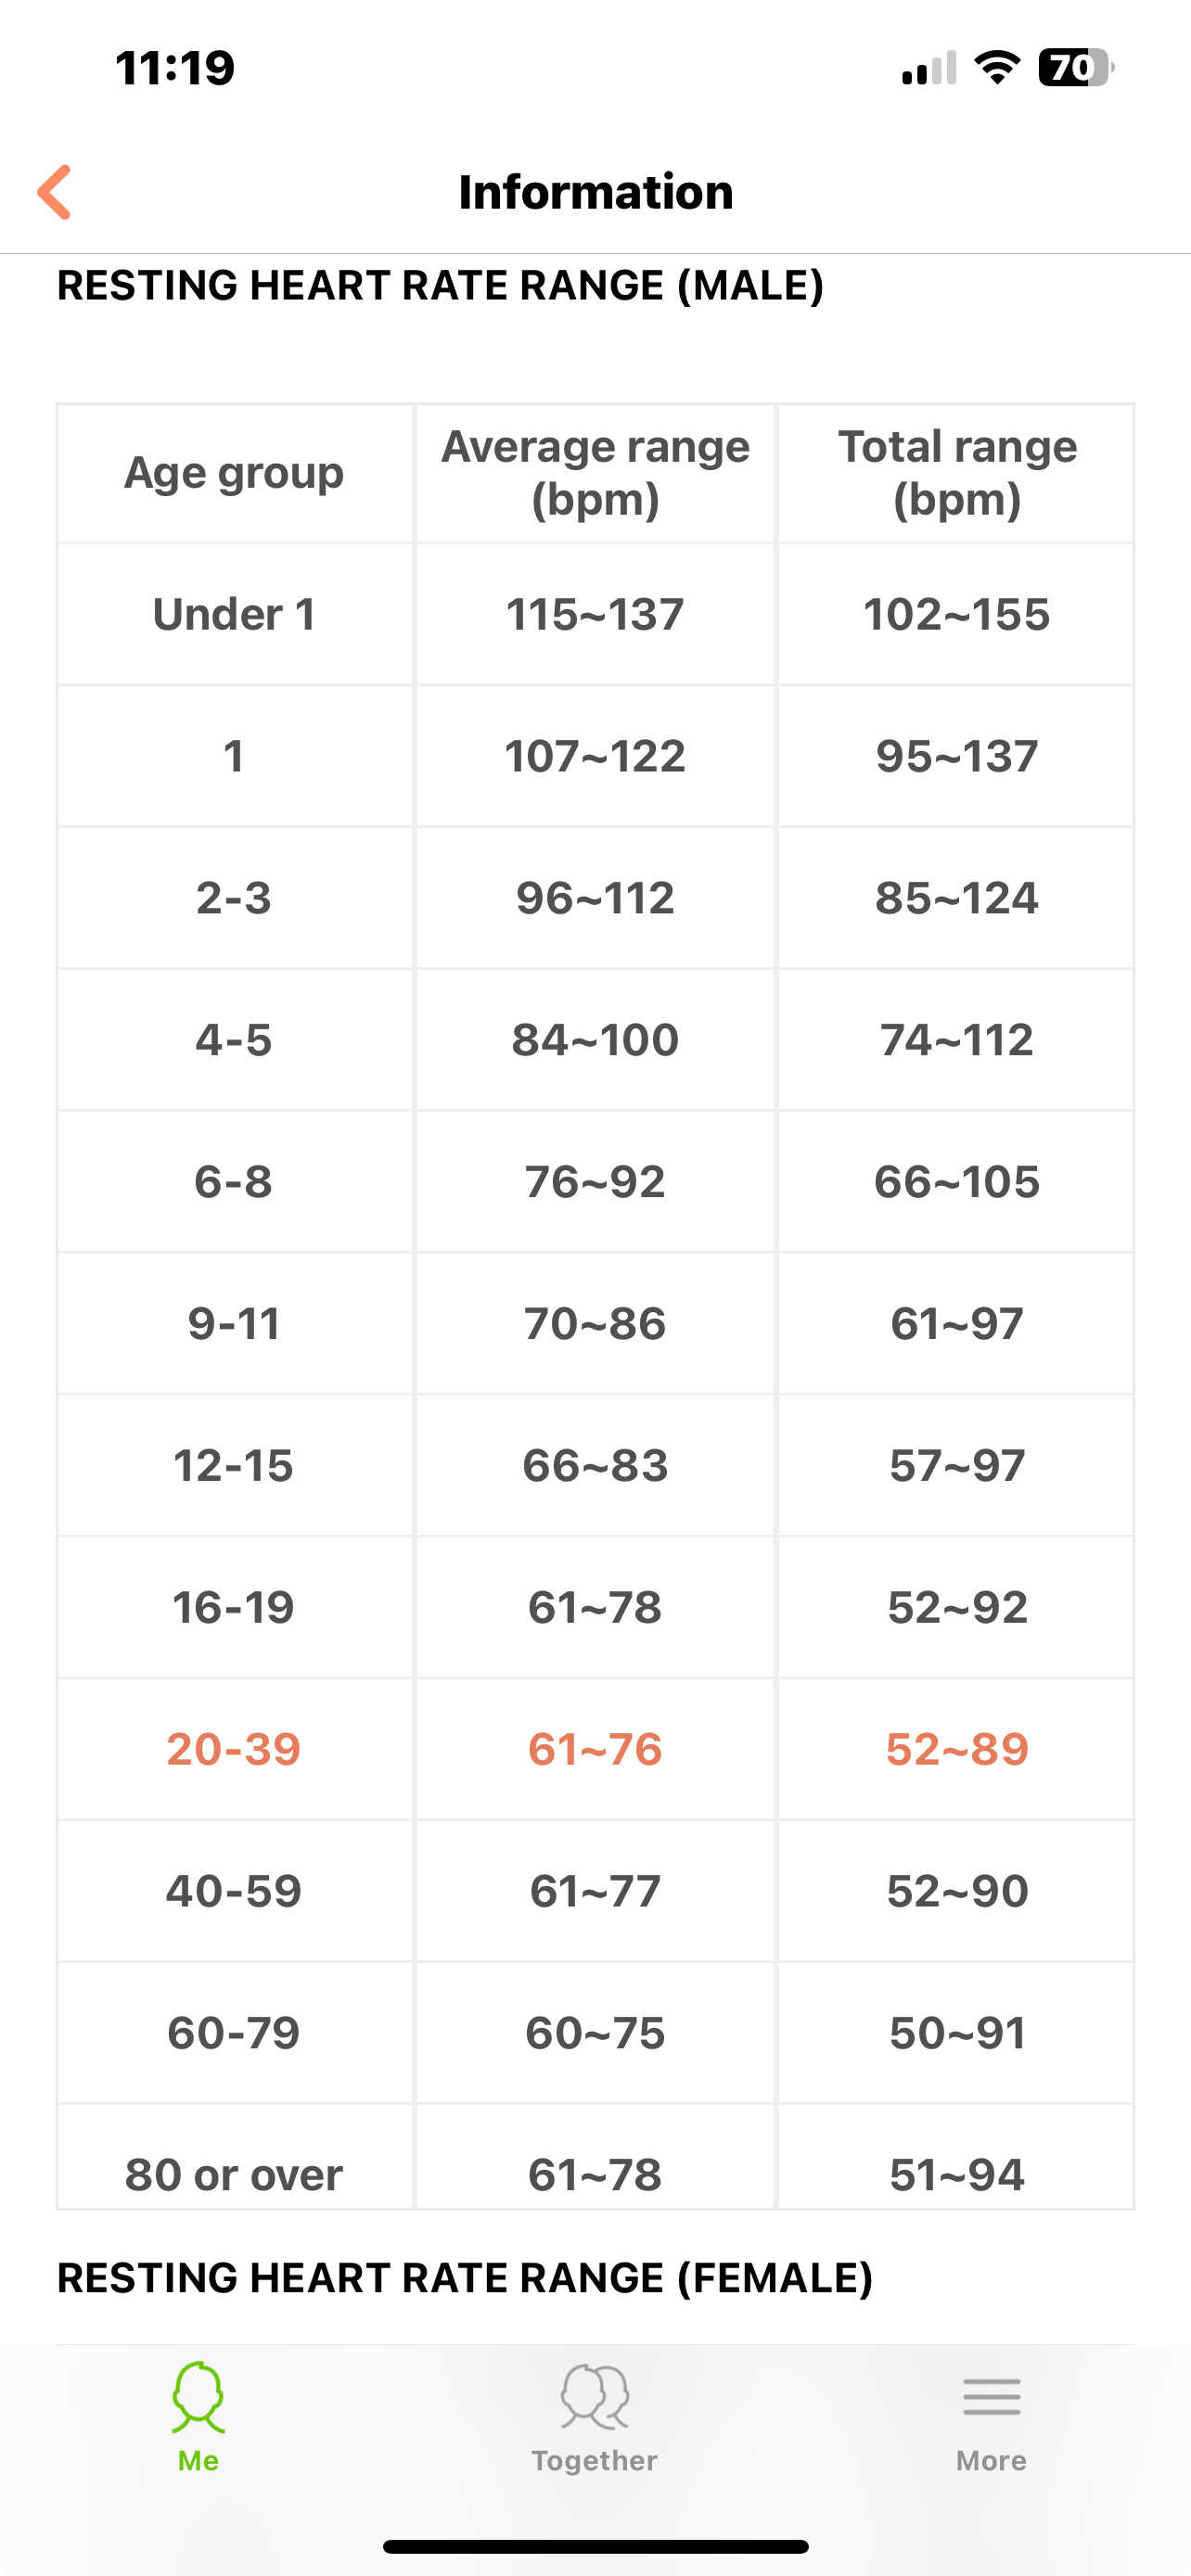

In [195]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [196]:
library(ggplot2)
library(tidyr)
library(gridExtra)
library(RColorBrewer)

In [197]:
library(readr) # Load readr
file_path = "/content/fitness_activity_stats.csv"
cols_to_read <- c("Duration", "Distance", "Calories", "Steps", "LongestActiveTime", "AvgBpm", "Fit")

data <- read_csv(file = file_path, col_select = all_of(cols_to_read), col_types = cols(
  Duration = col_double(),
  Distance = col_double(),
  Calories = col_double(),
  Steps = col_double(),
  LongestActiveTime = col_double(),
  AvgBpm = col_double(),
  Fit = col_character()
))
# spec(data)


In [198]:
head(data)

Duration,Distance,Calories,Steps,LongestActiveTime,AvgBpm,Fit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
216,16.53,884,23376,89,110,NO
213,13.32,697,21593,186,110,NO
126,7.59,387,12599,117,85,NO
23,8.33,437,13374,116,89,NO
43,2.70,144,3992,60,73,YES
126,7.57,388,12545,118,77,YES


In [199]:
summary(data)

    Duration         Distance         Calories         Steps      
 Min.   :  3.00   Min.   : 0.190   Min.   : 14.0   Min.   :  308  
 1st Qu.: 16.75   1st Qu.: 2.035   1st Qu.:104.2   1st Qu.: 3091  
 Median : 91.00   Median : 6.340   Median :328.5   Median : 9762  
 Mean   : 90.28   Mean   : 6.105   Mean   :319.0   Mean   : 9429  
 3rd Qu.:135.50   3rd Qu.: 8.760   3rd Qu.:444.2   3rd Qu.:13511  
 Max.   :231.00   Max.   :16.530   Max.   :884.0   Max.   :23376  
 LongestActiveTime     AvgBpm           Fit           
 Min.   :  0.00    Min.   :  0.00   Length:32         
 1st Qu.:  3.00    1st Qu.: 74.00   Class :character  
 Median : 15.00    Median : 77.50   Mode  :character  
 Mean   : 36.12    Mean   : 77.03                     
 3rd Qu.: 40.50    3rd Qu.: 82.25                     
 Max.   :186.00    Max.   :110.00                     

In [200]:
features <- colnames(data)
sub_data <- data[, c("Duration", "Distance", "Calories", "Steps", "LongestActiveTime", "AvgBpm")]

sub_features = features[1:5]
size = length(sub_features)

print(sub_features)

[1] "Duration"          "Distance"          "Calories"         
[4] "Steps"             "LongestActiveTime"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


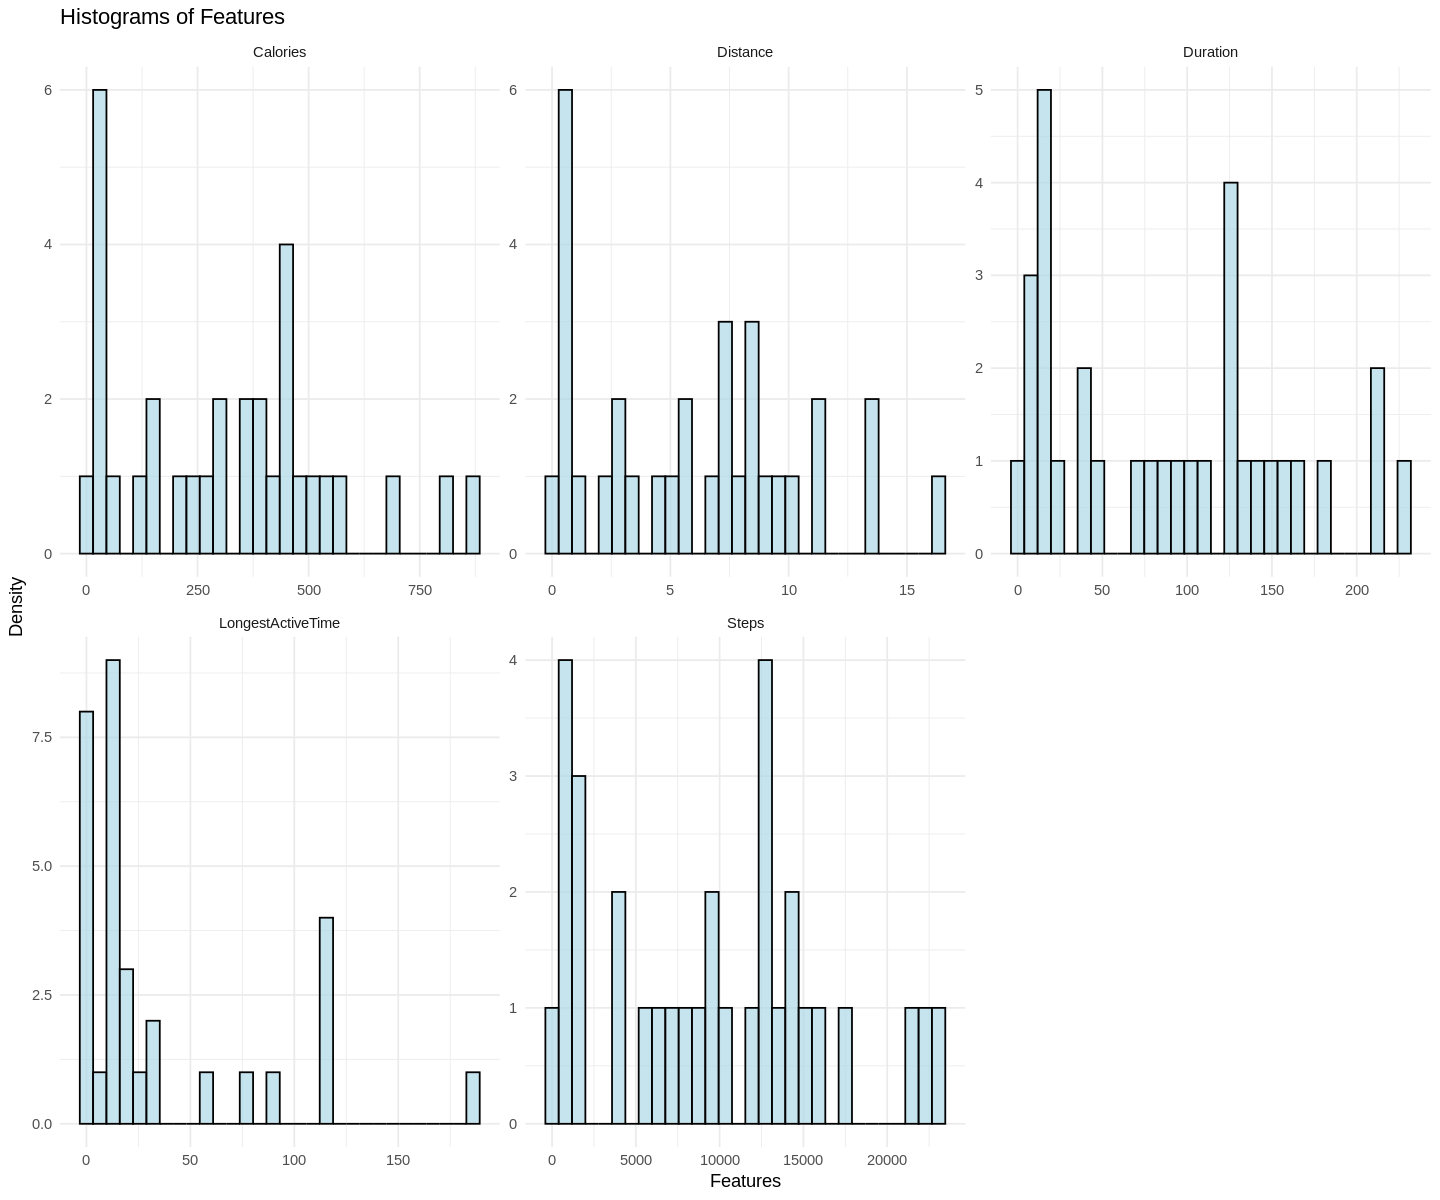

In [202]:
# Reshape data to long format
# data_long <- pivot_longer(data, cols = everything())
options(repr.plot.width = 12, repr.plot.height = 10)

features <- gather(sub_data, key = "variable", value = "value", -AvgBpm)


# Create the plot
ggplot(features, aes(x = value)) +
  geom_histogram(fill = "lightblue", color = "black", alpha = 0.7) +
  facet_wrap(~ variable, scales = "free") +

  theme_minimal() +
  labs(x = "Features", y = "Density", title = "Histograms of Features")


# for (i in 1:size) {
#   hist(sub_data[[sub_features[i]]], probability = TRUE, nclass = 14, main = paste("Histogram of", sub_features[i]),
#            xlab = sub_features[i])
# }

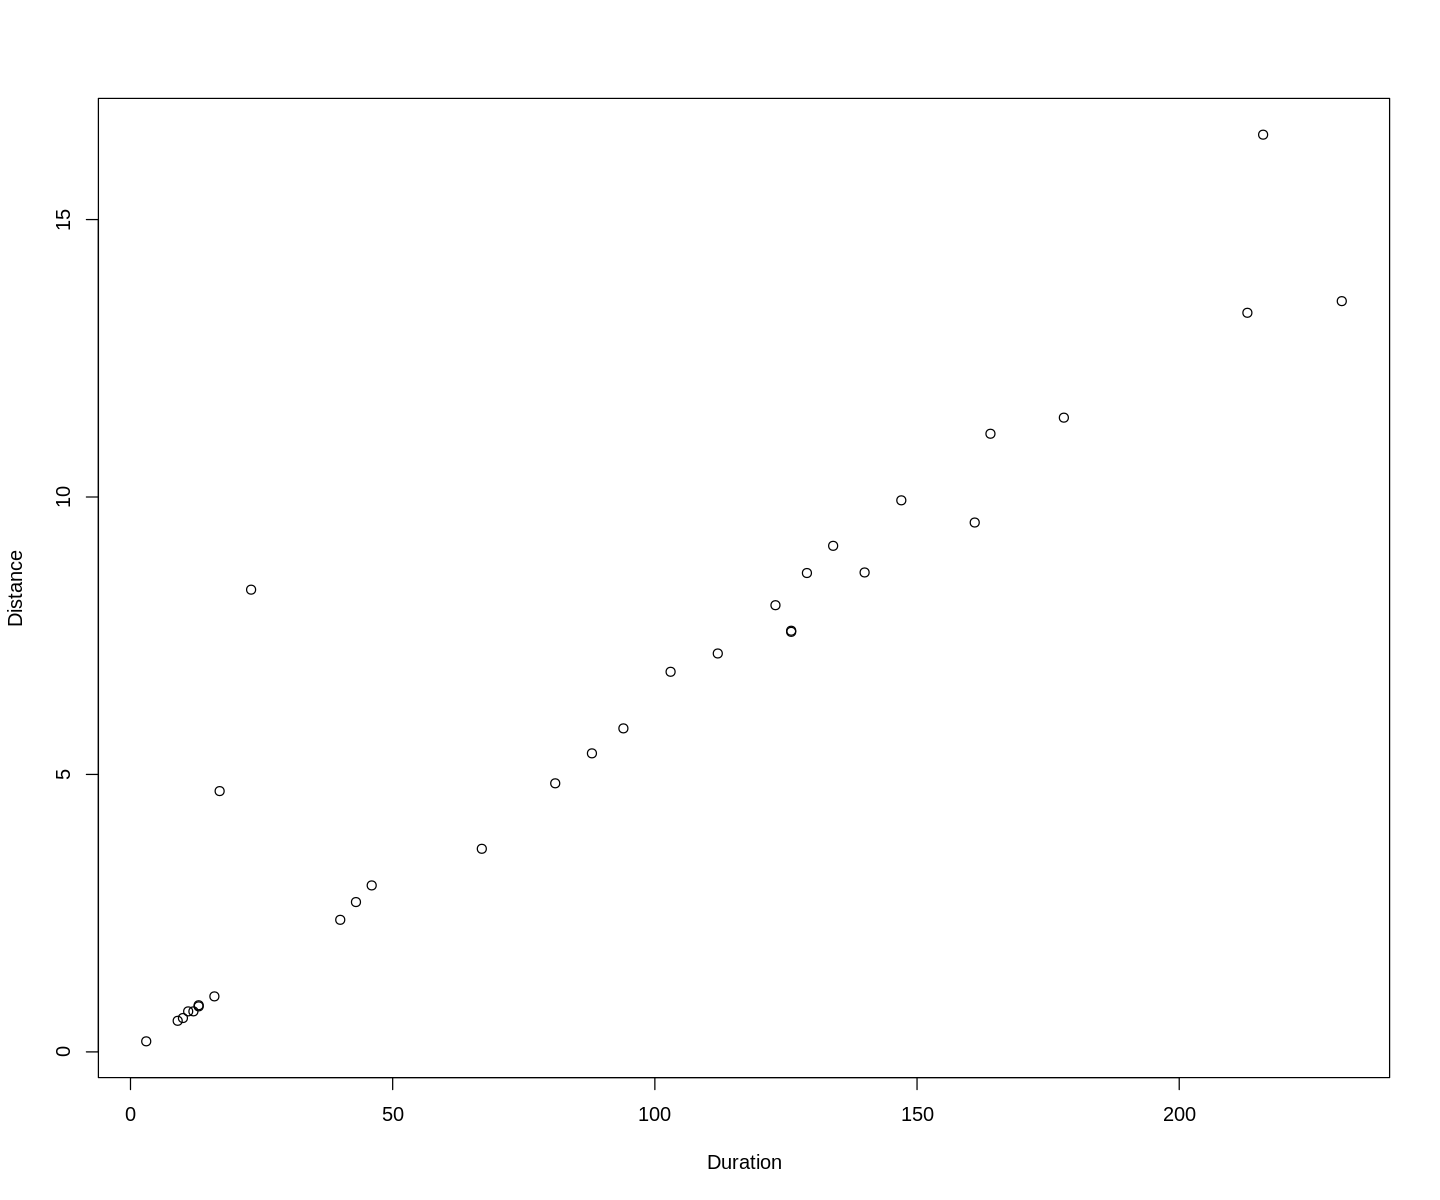

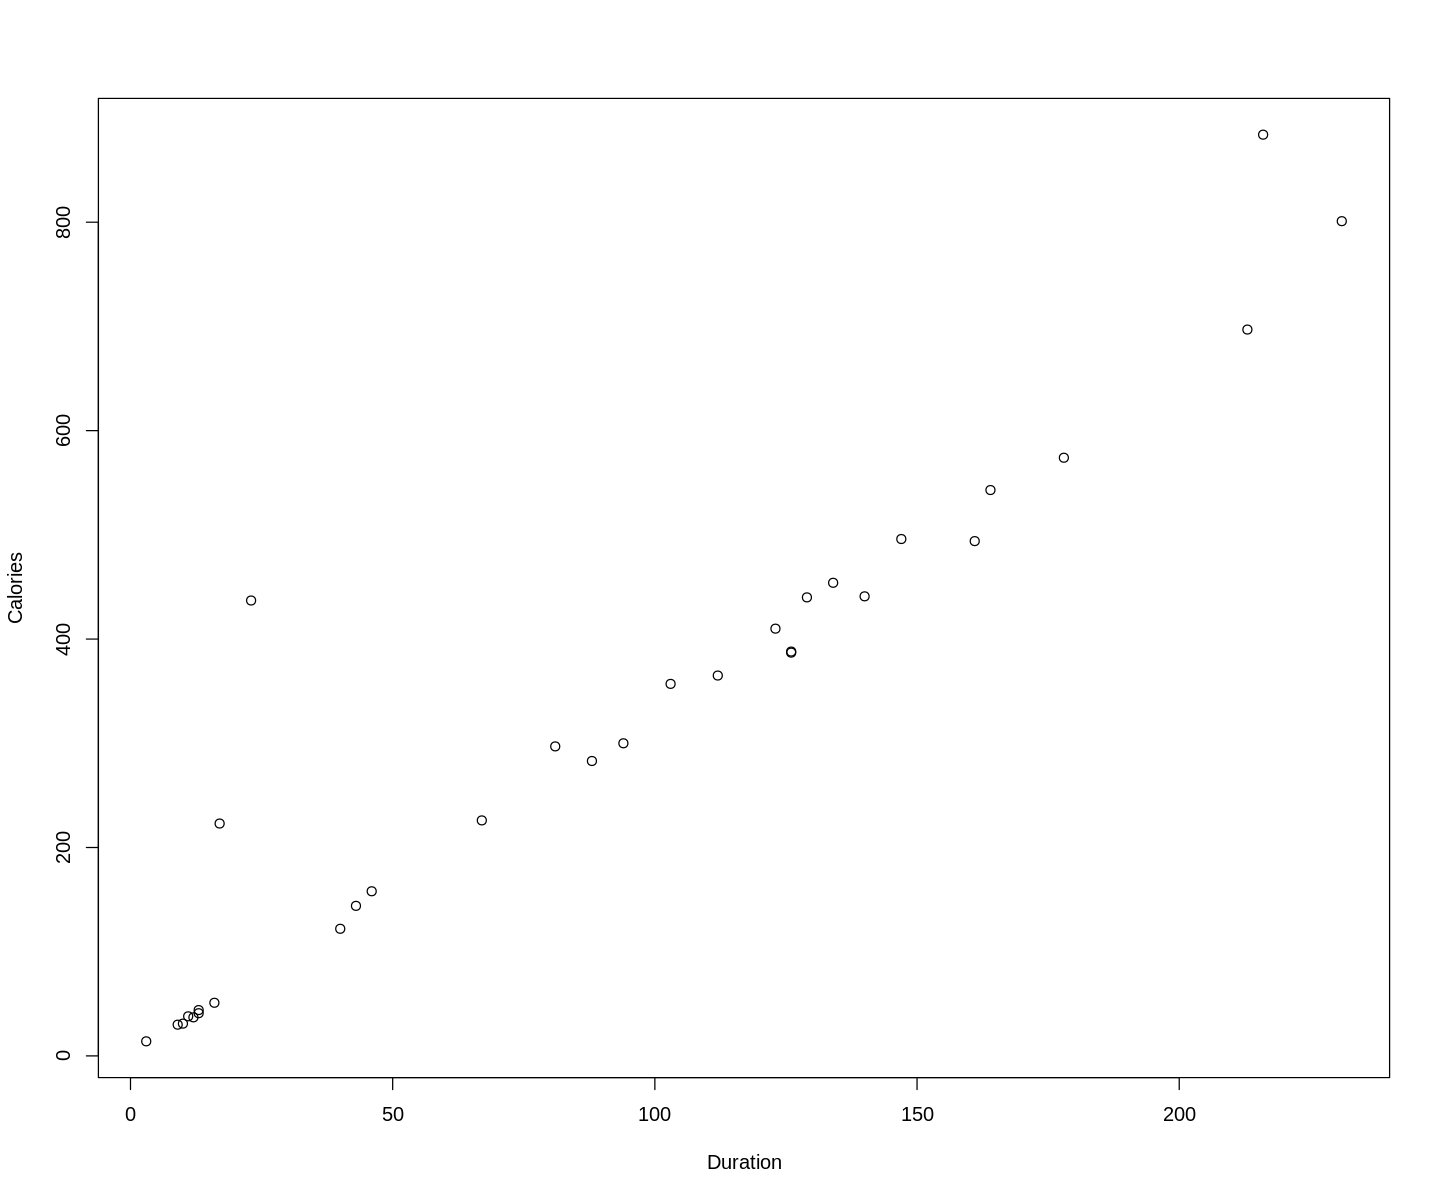

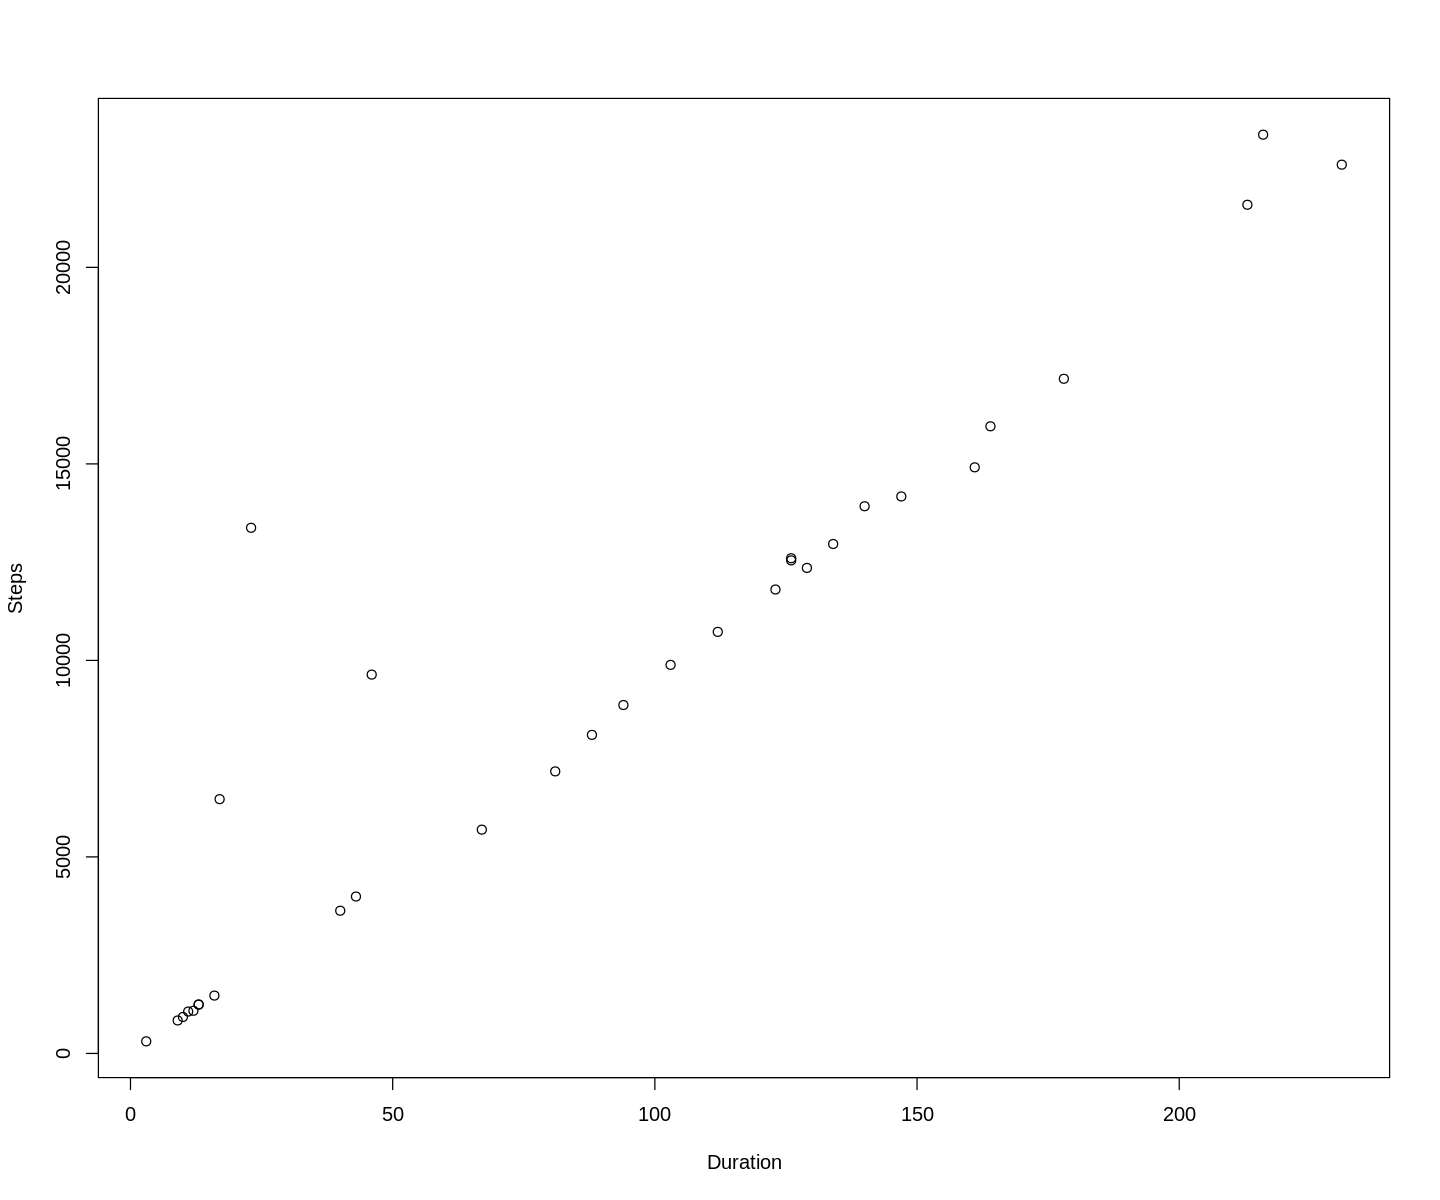

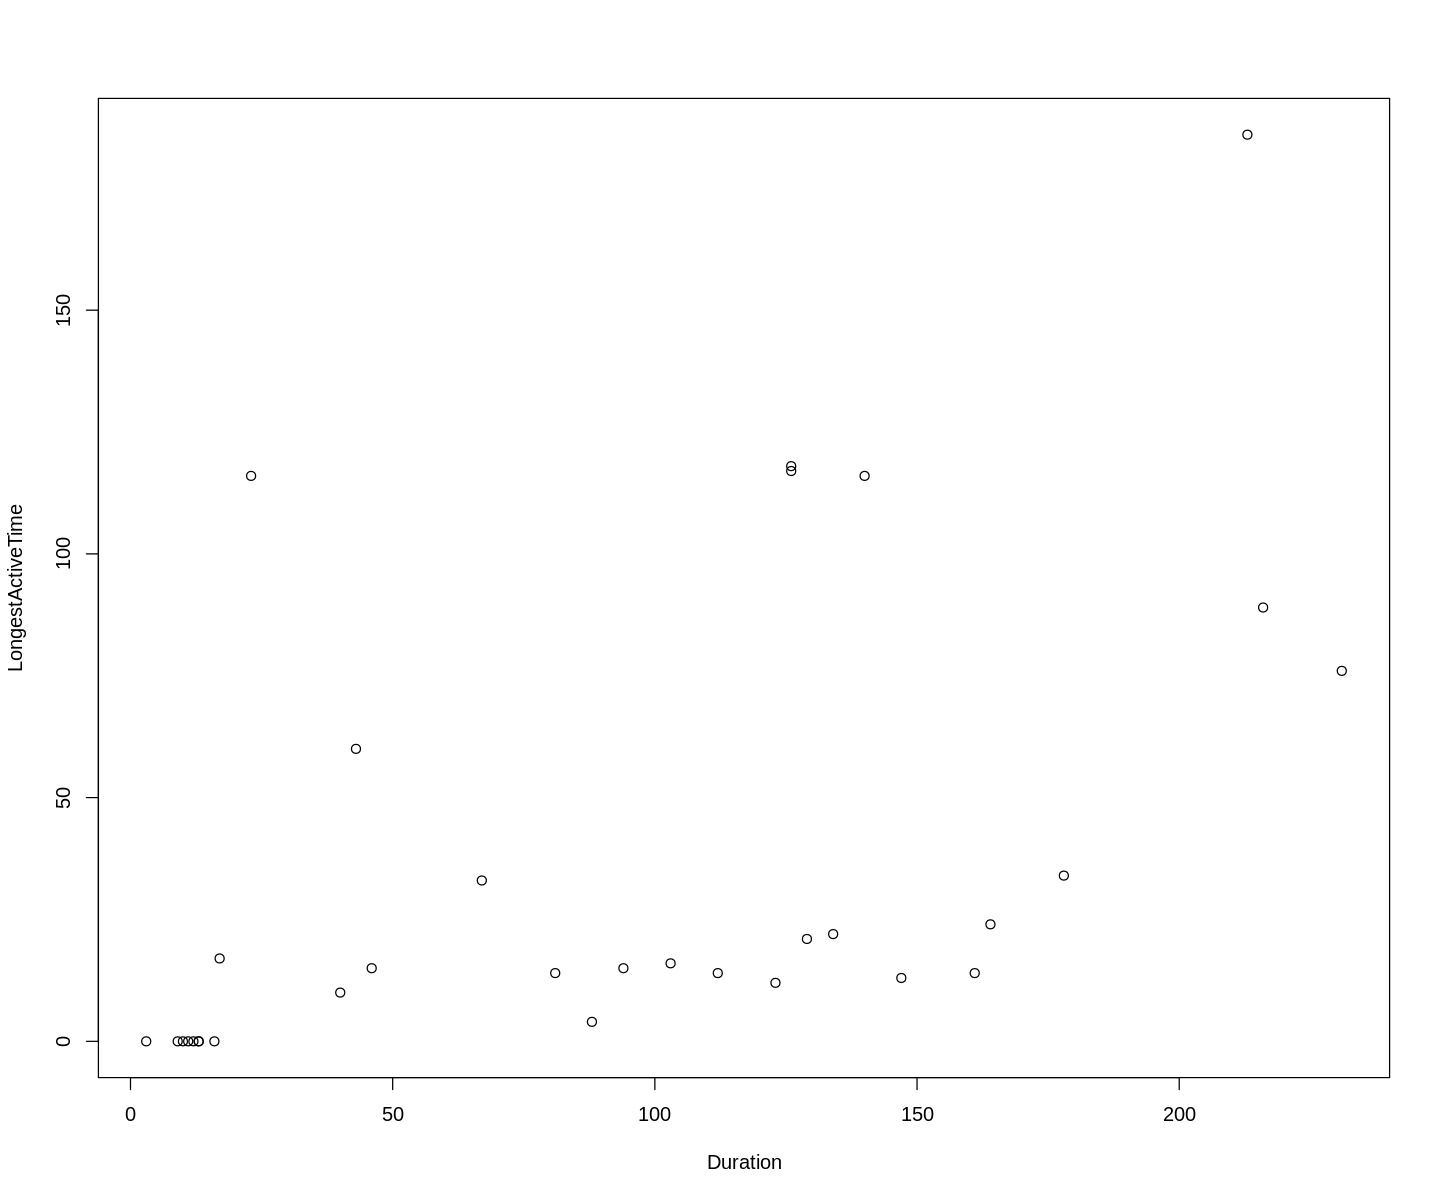

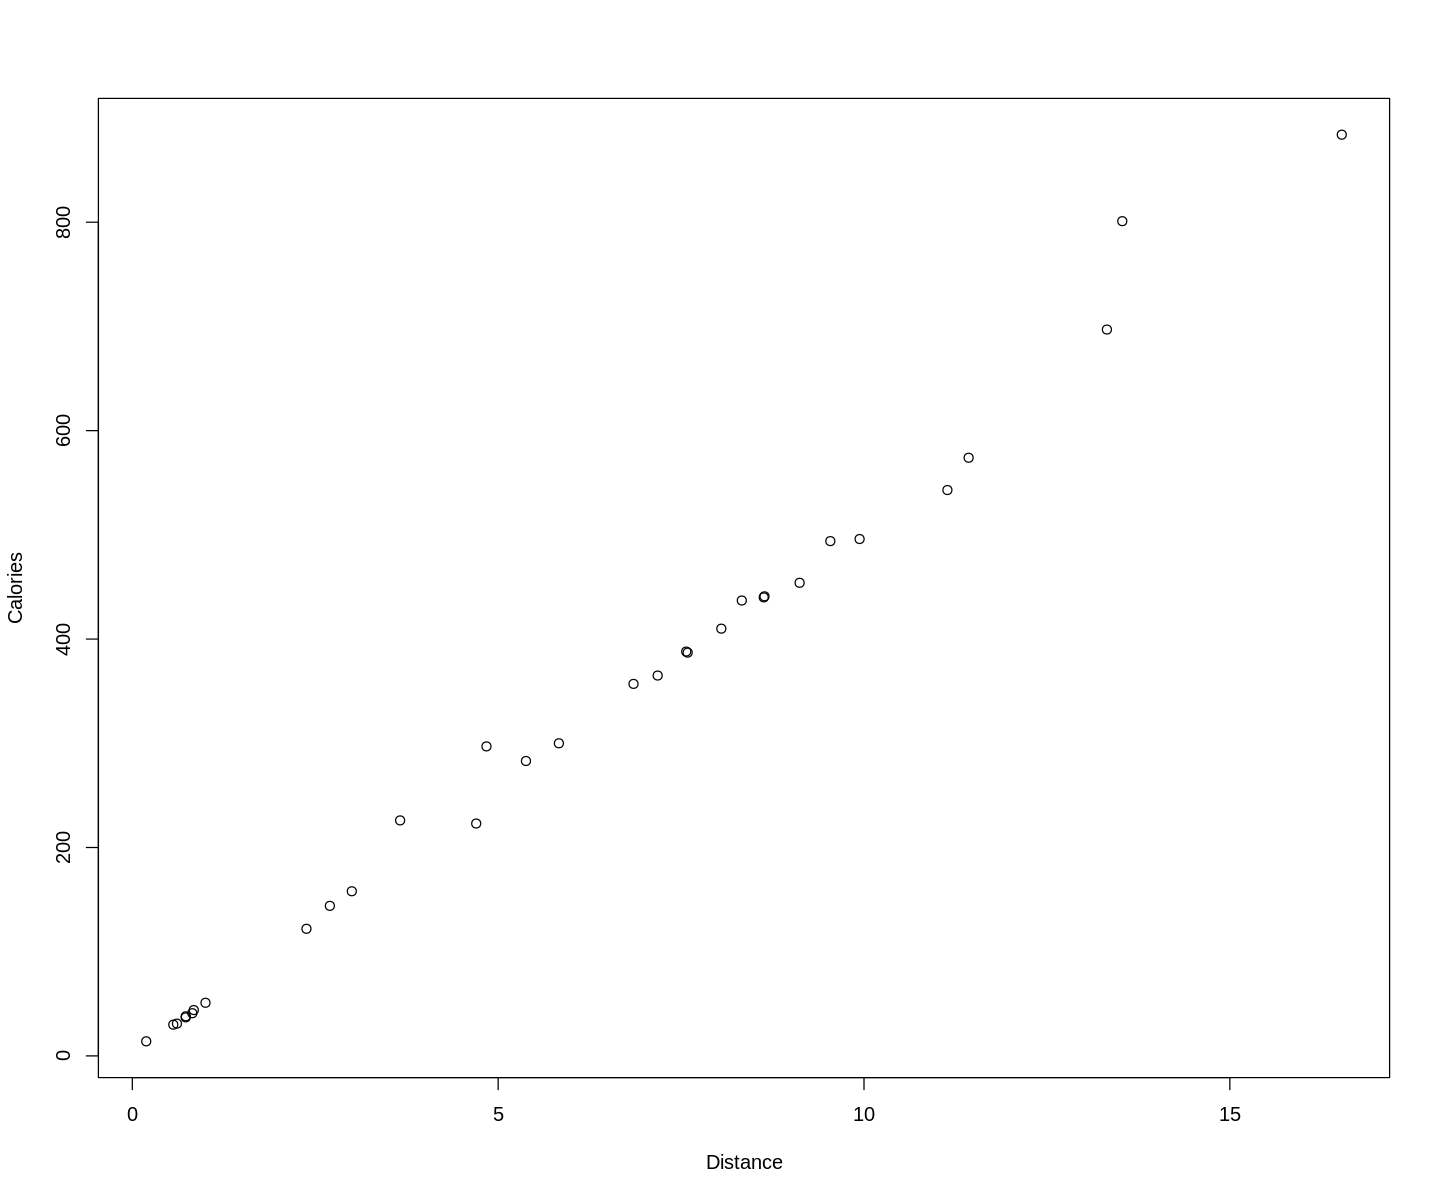

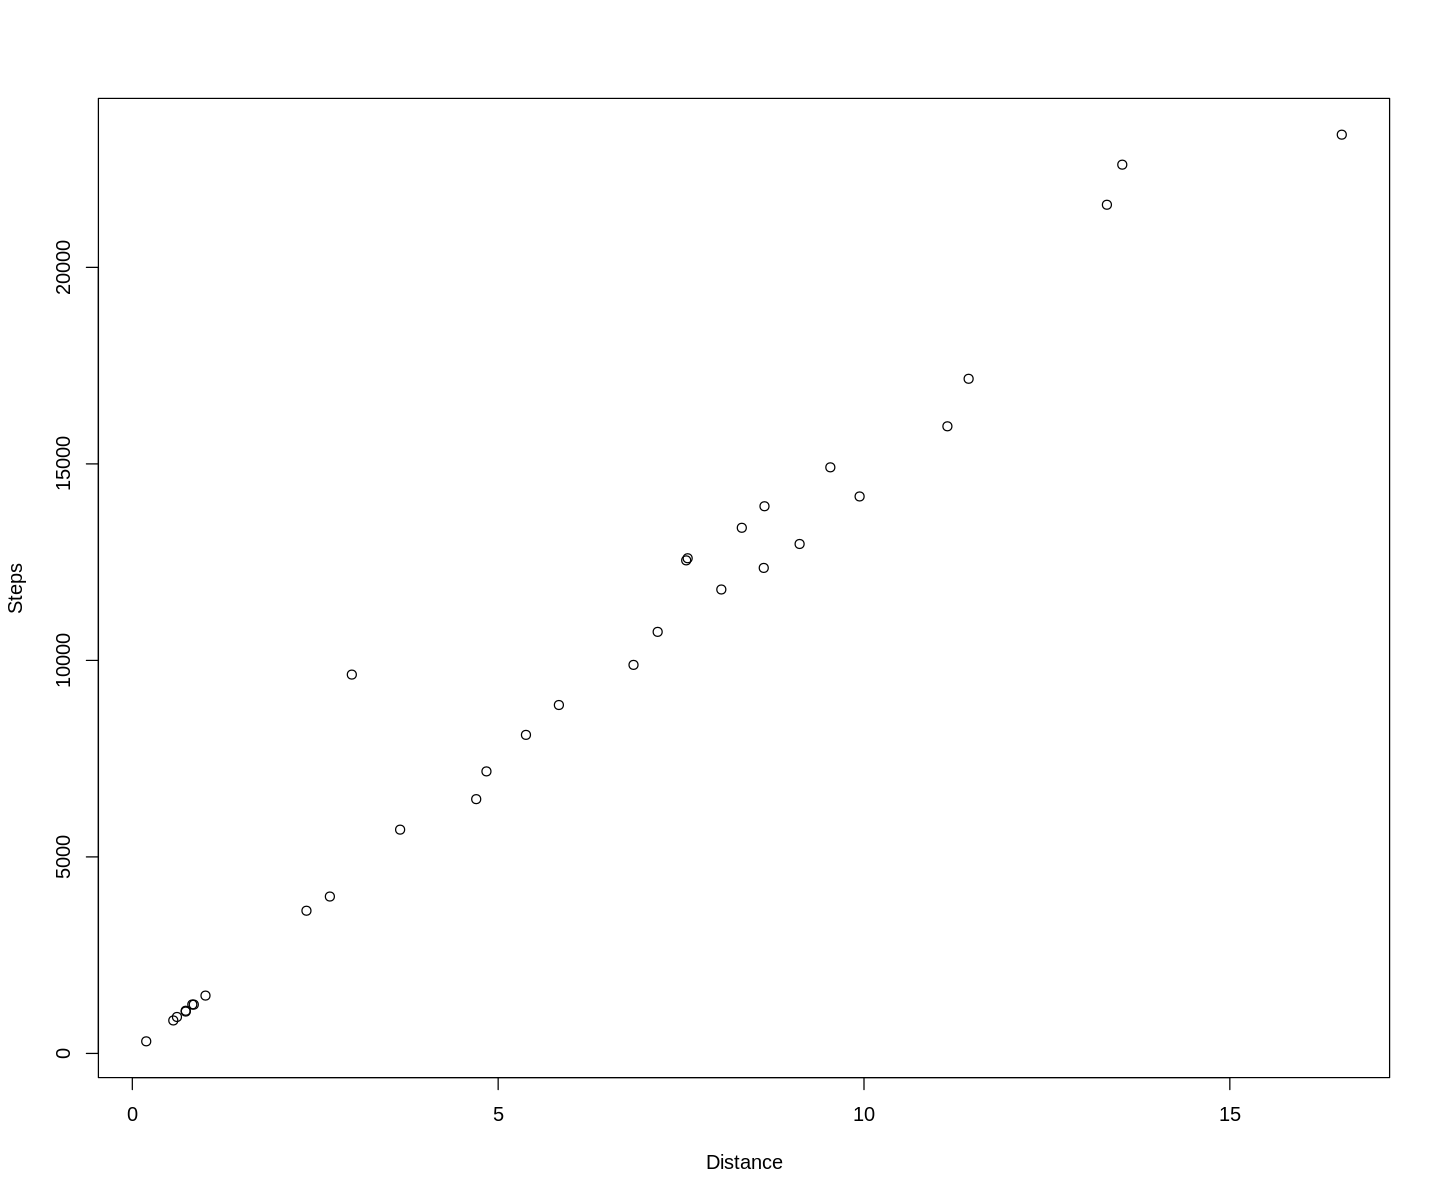

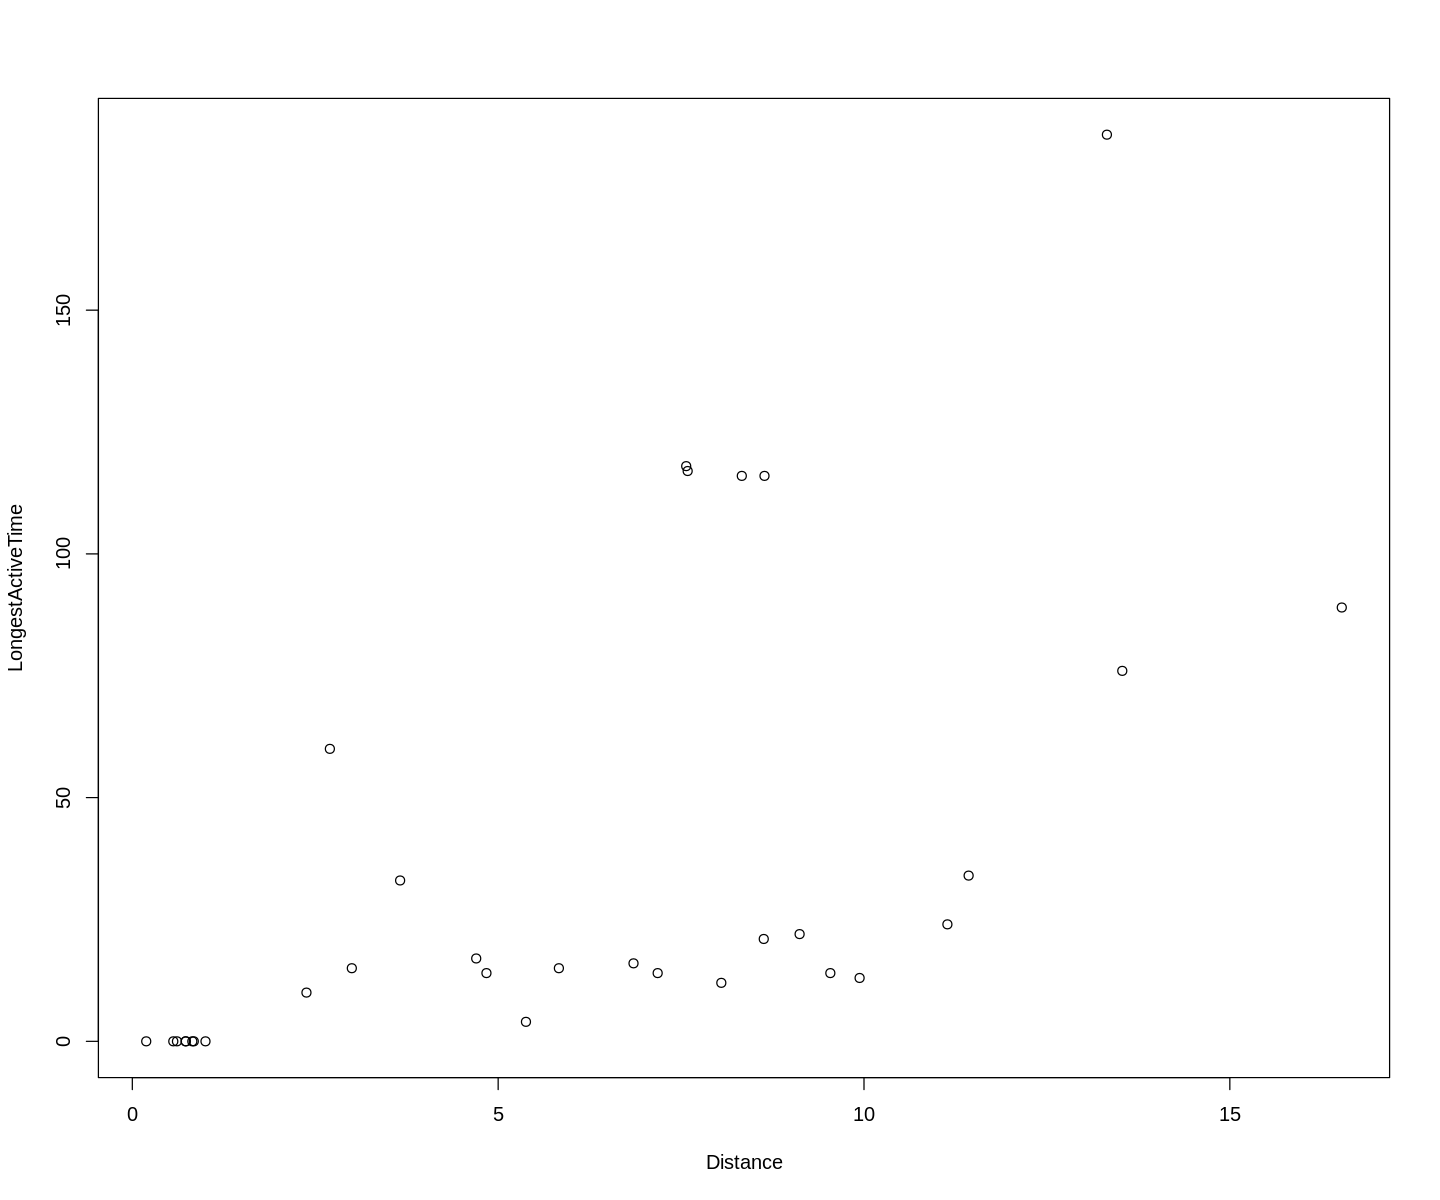

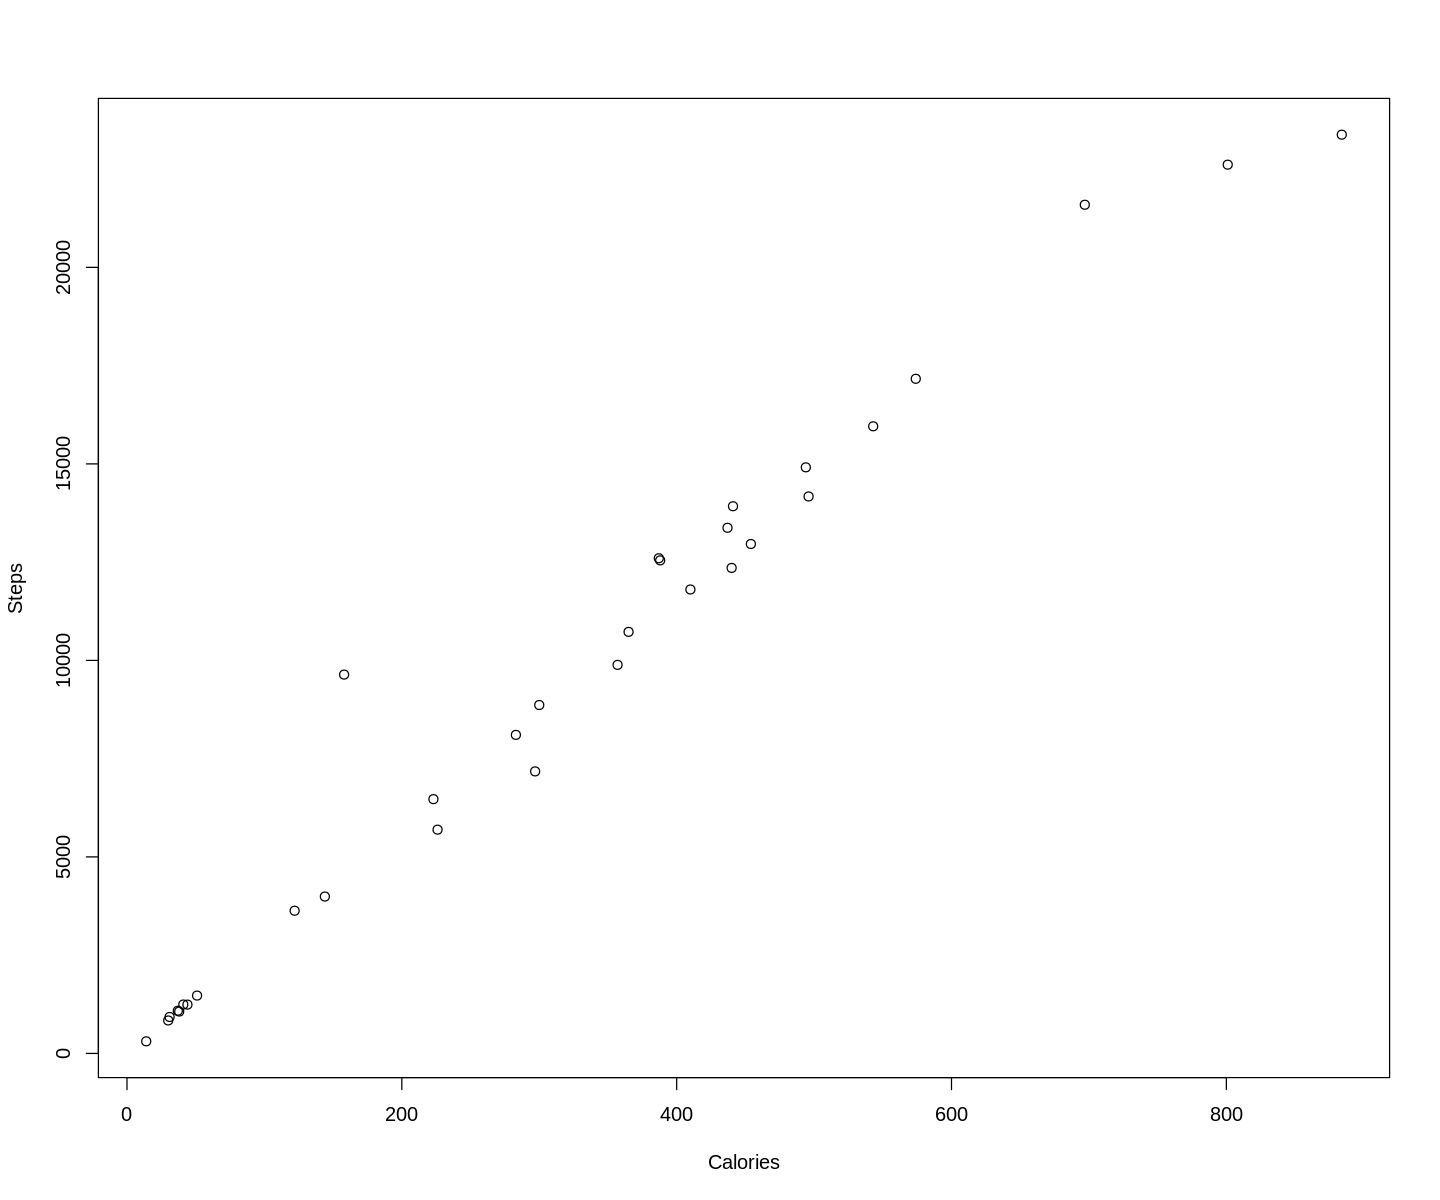

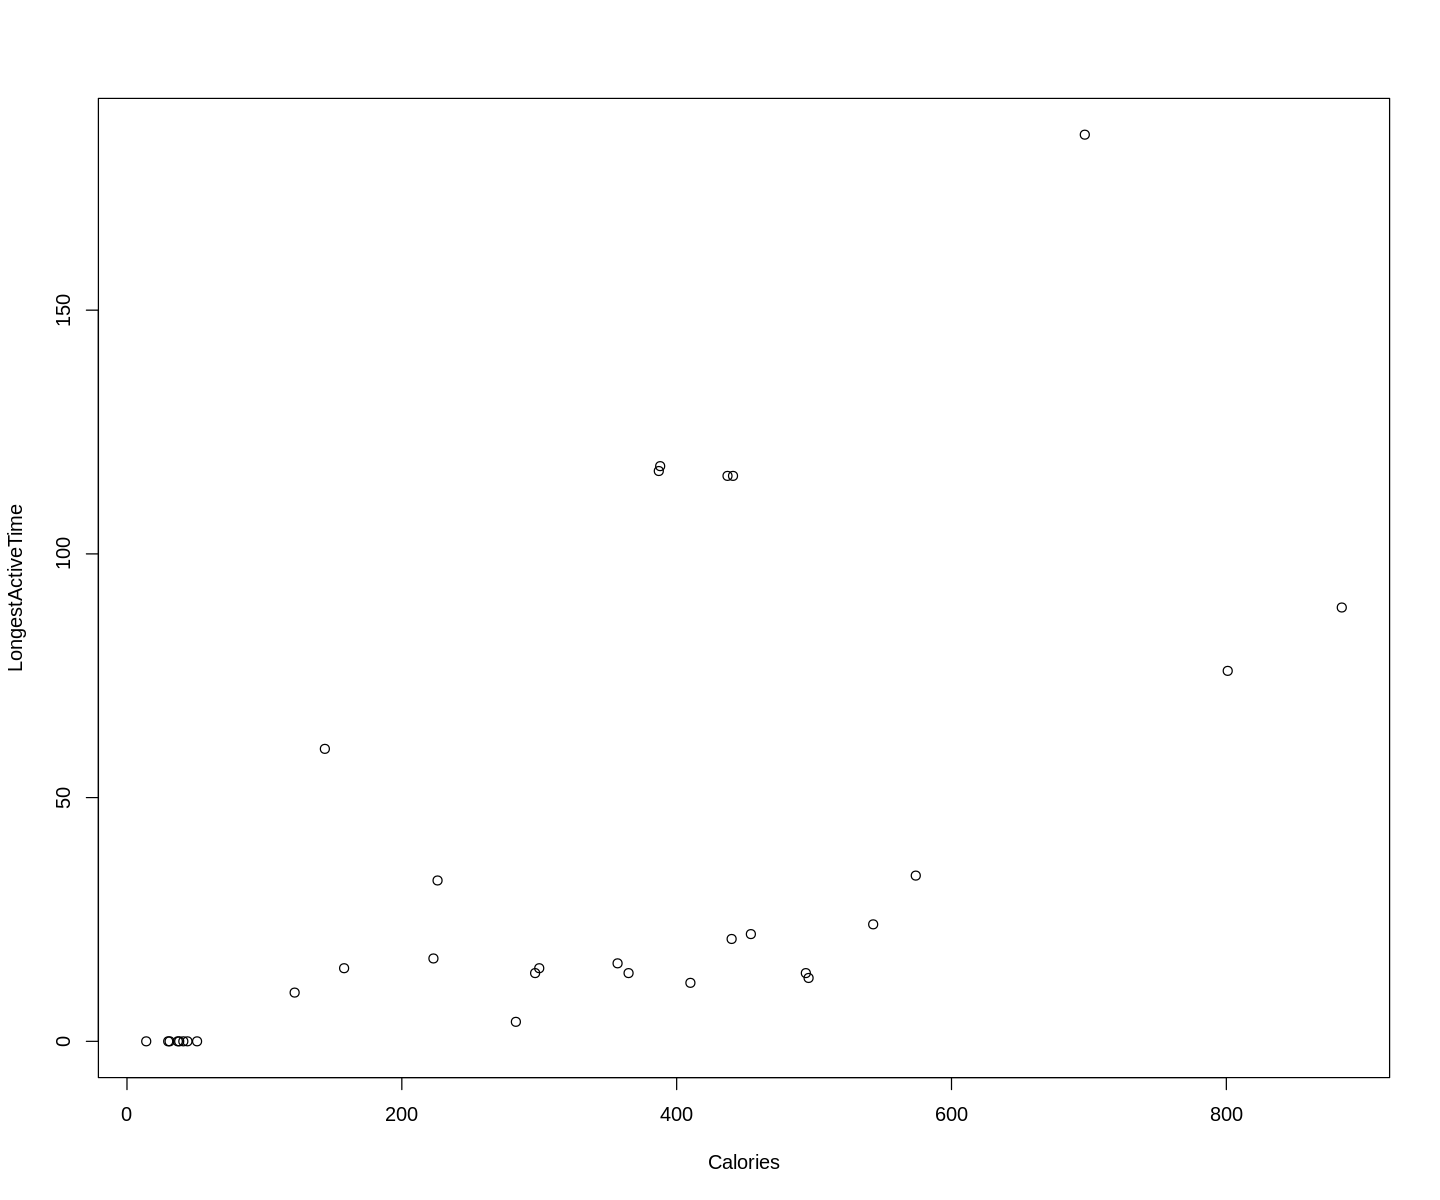

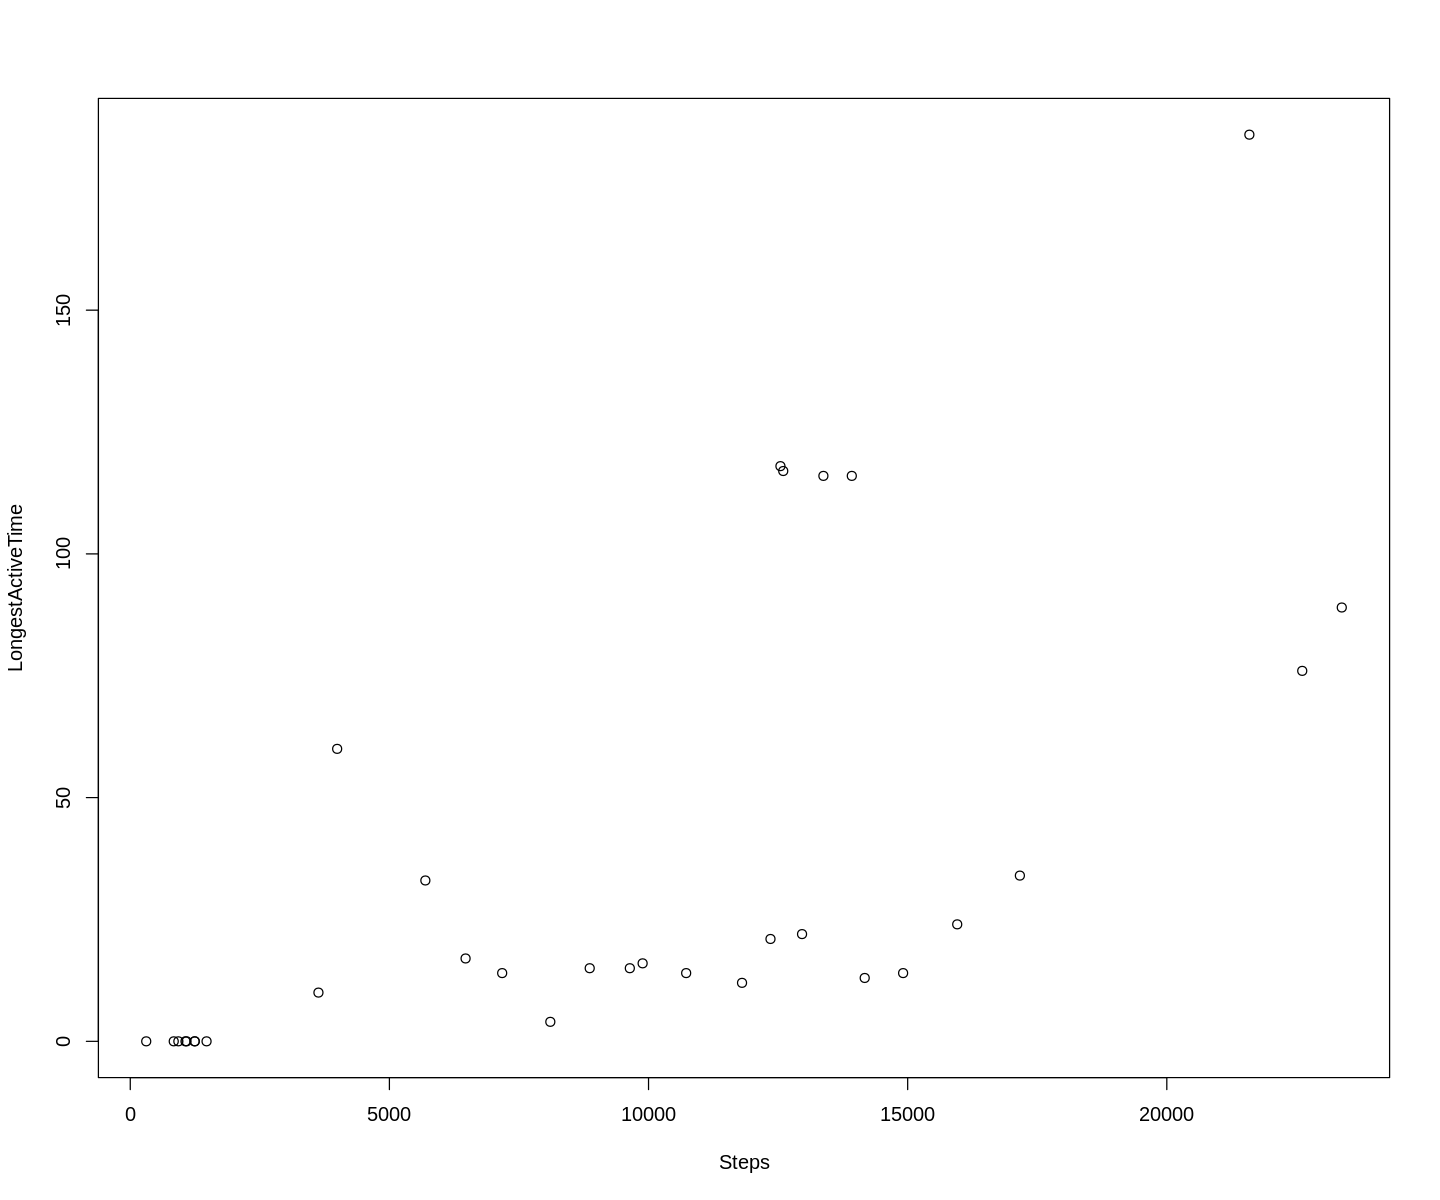

In [203]:


for (i in 1:(size-1)) {
  for (j in (i + 1):size) {
    plot(sub_data[[sub_features[i]]], sub_data[[sub_features[j]]], xlab = sub_features[i], ylab = sub_features[j])
  }
}


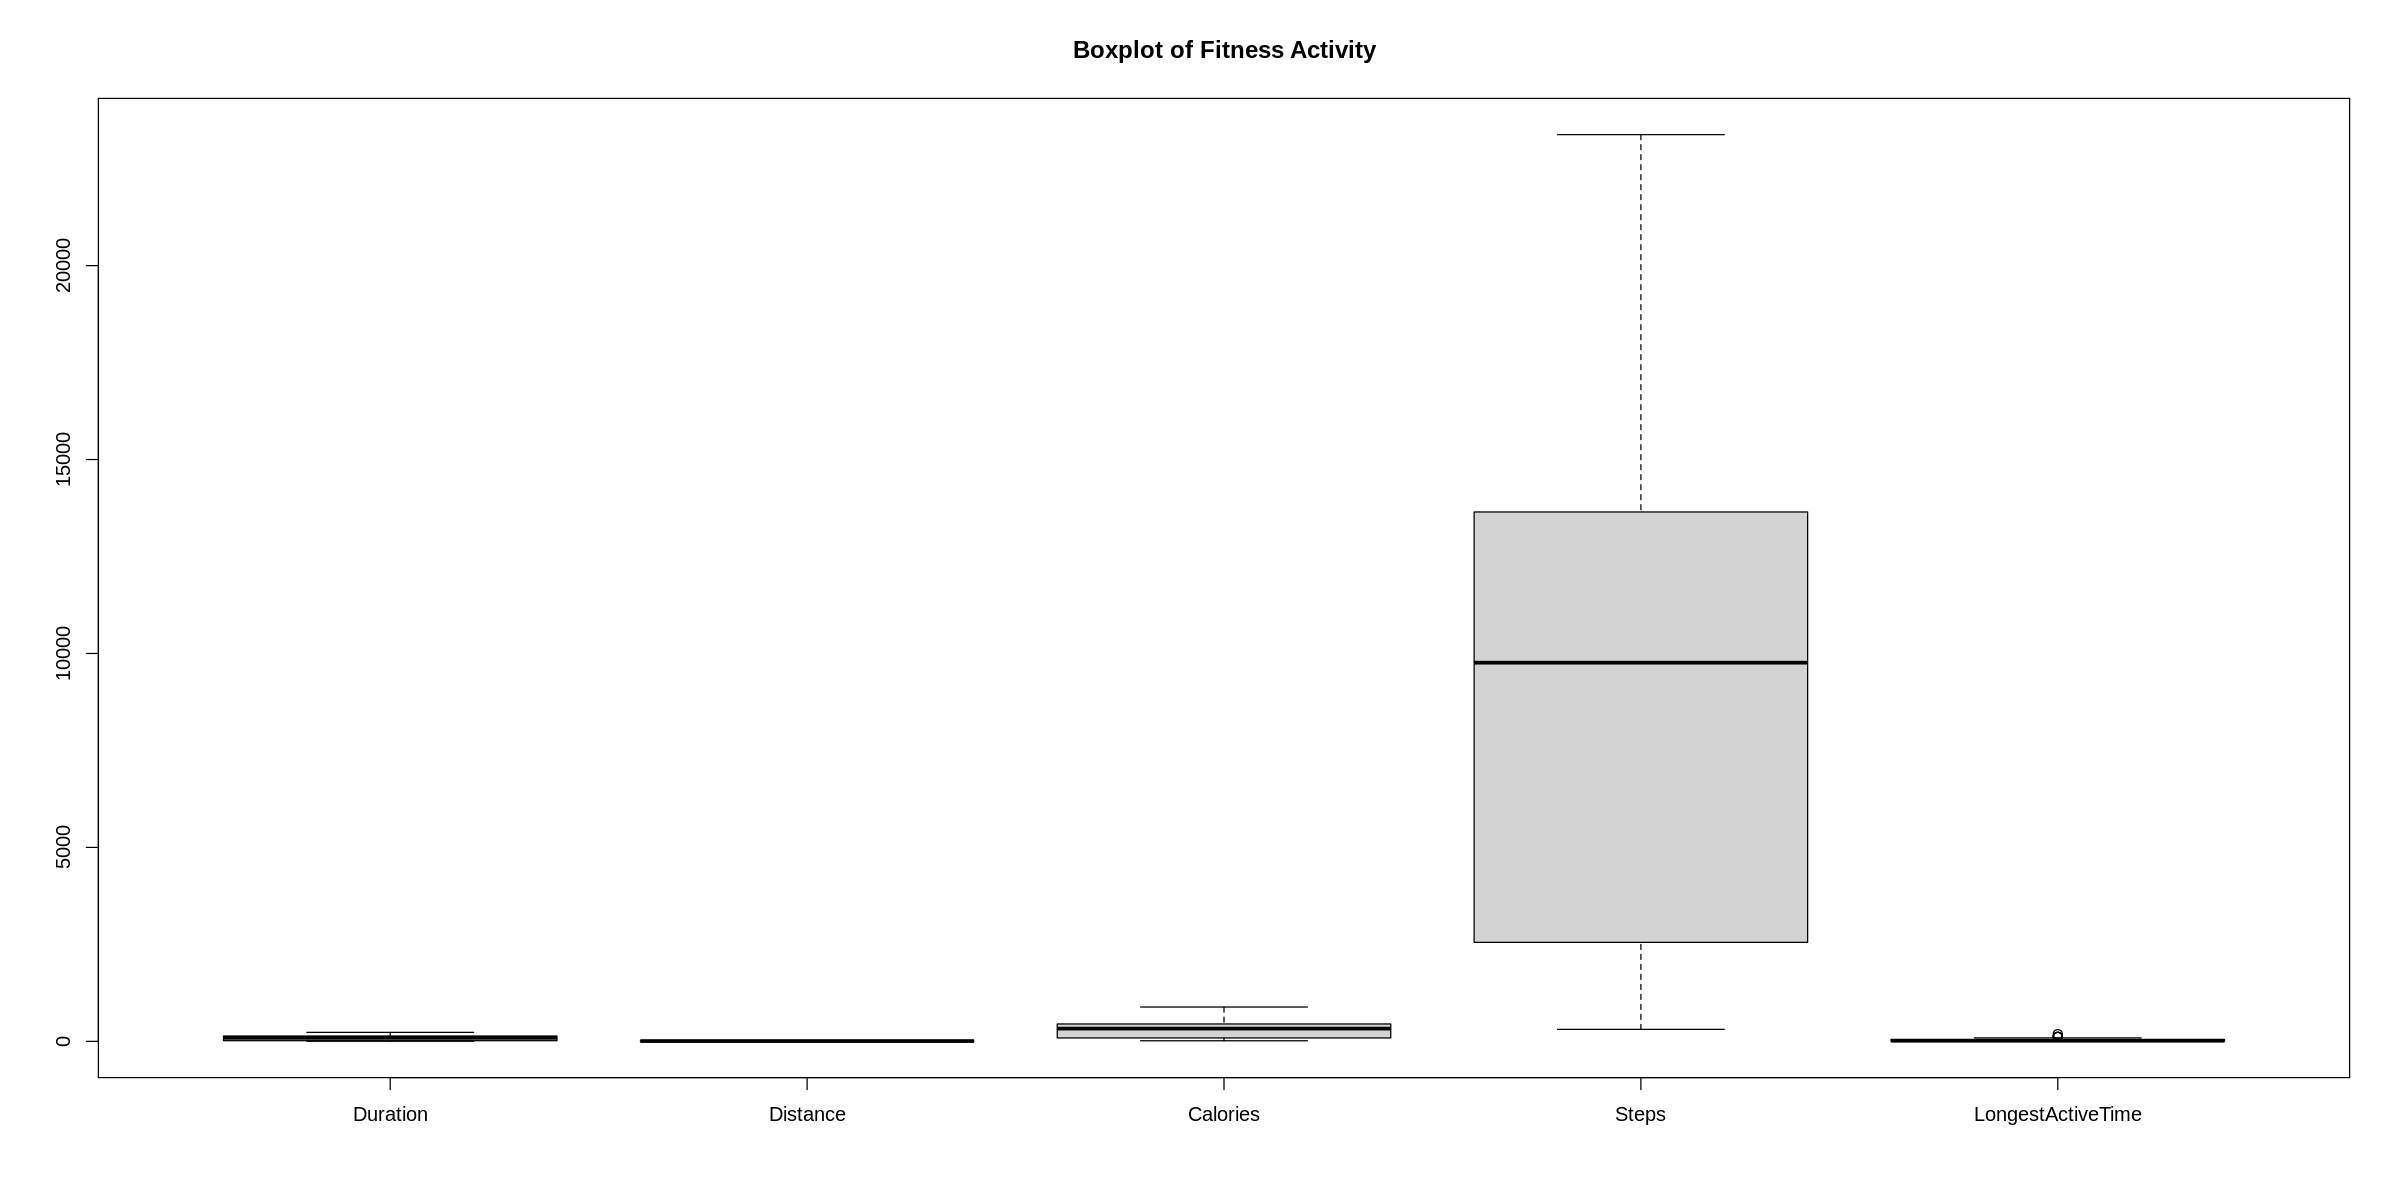

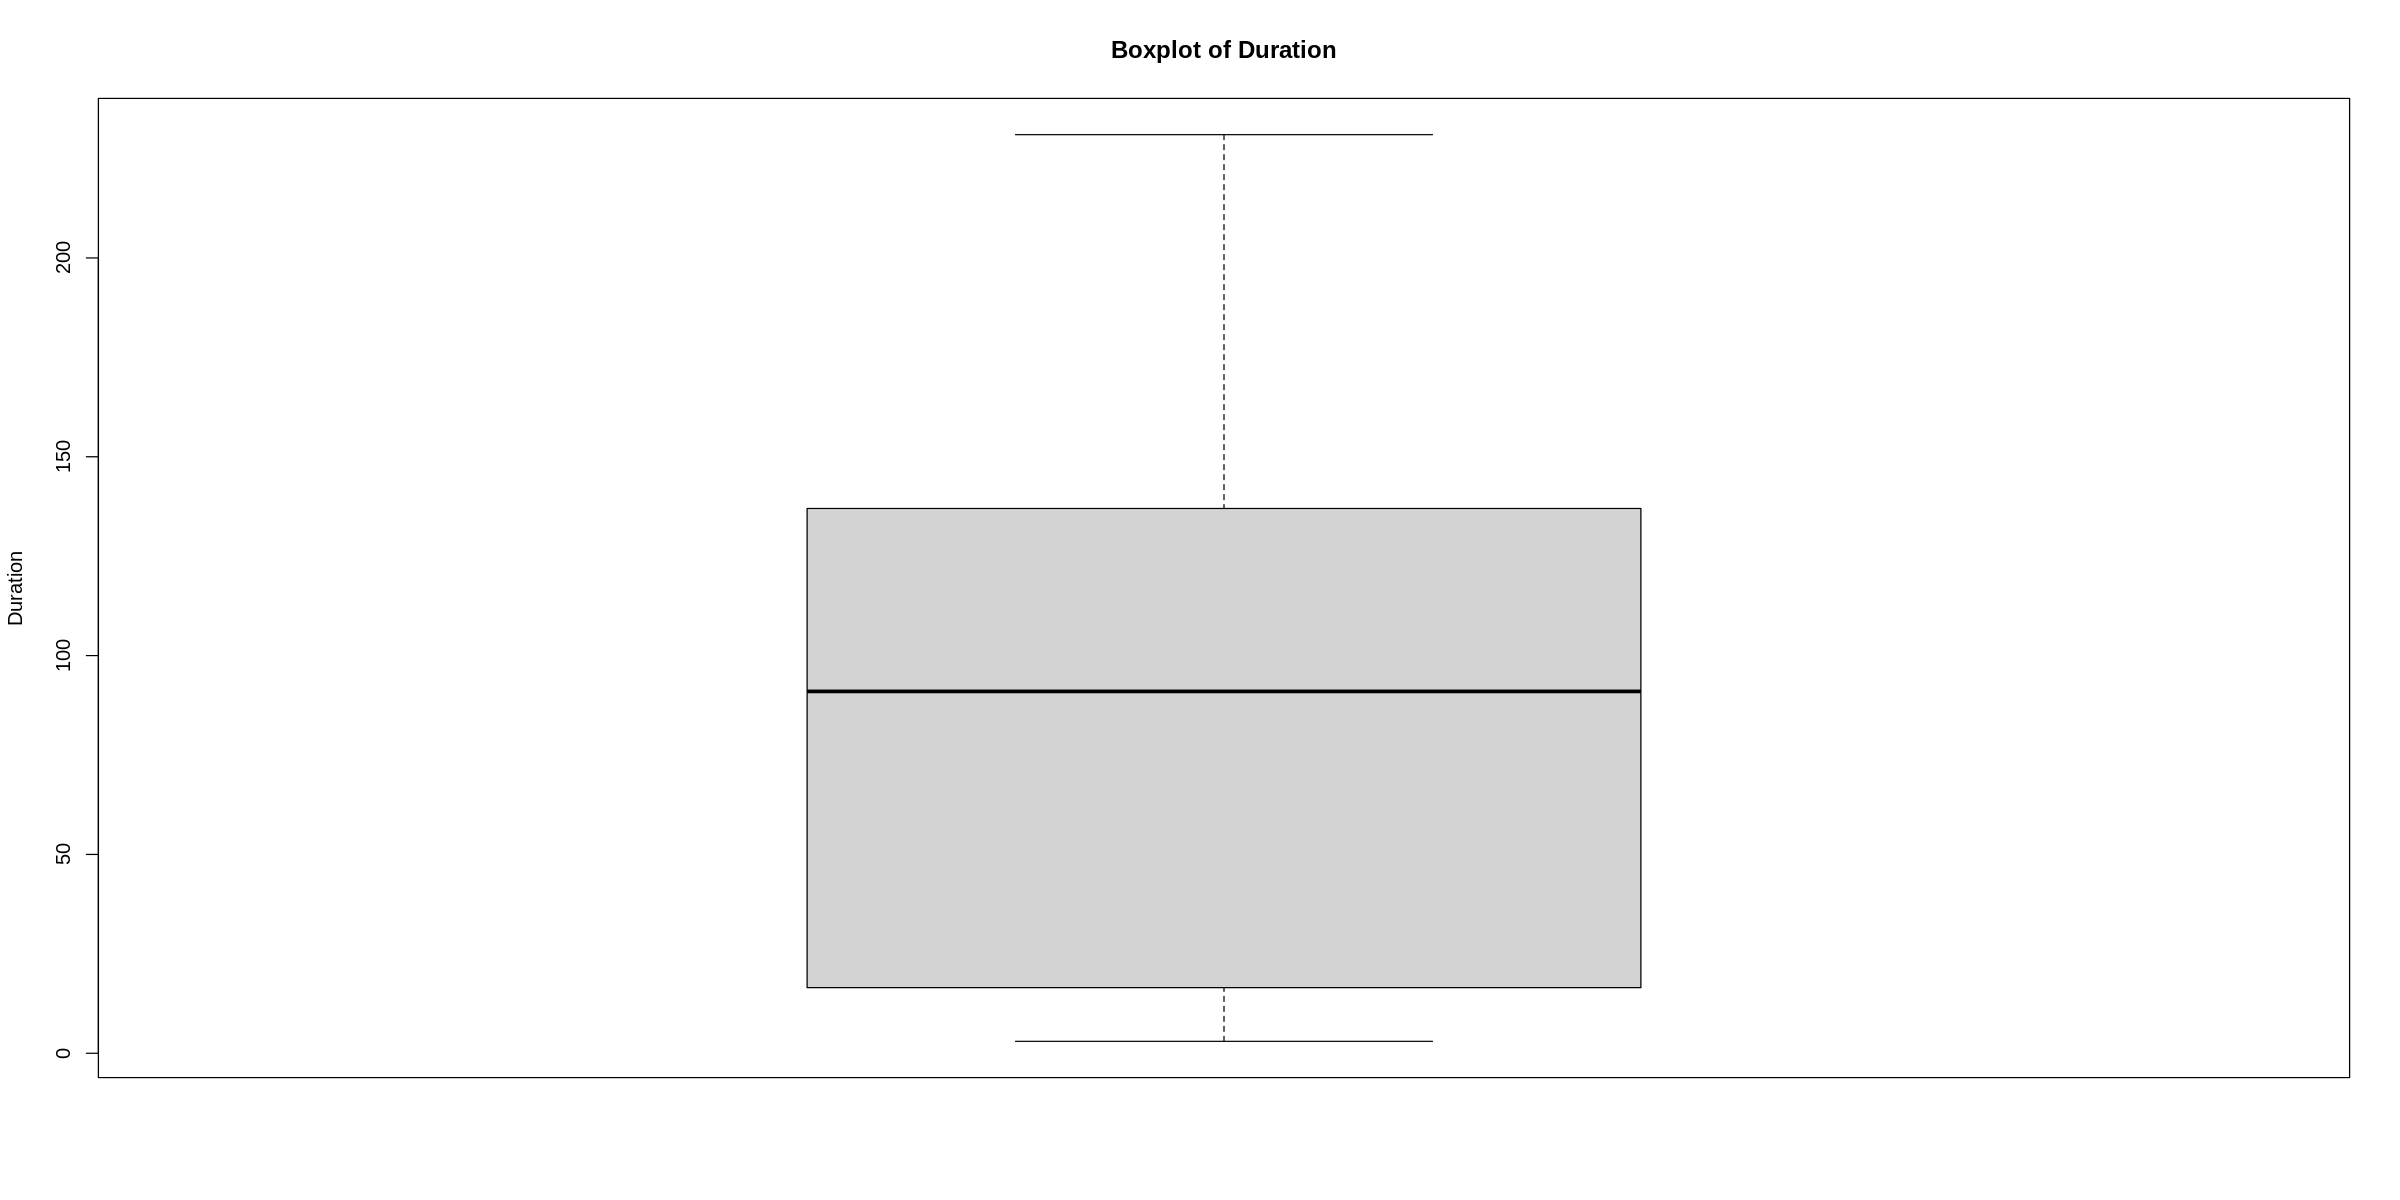

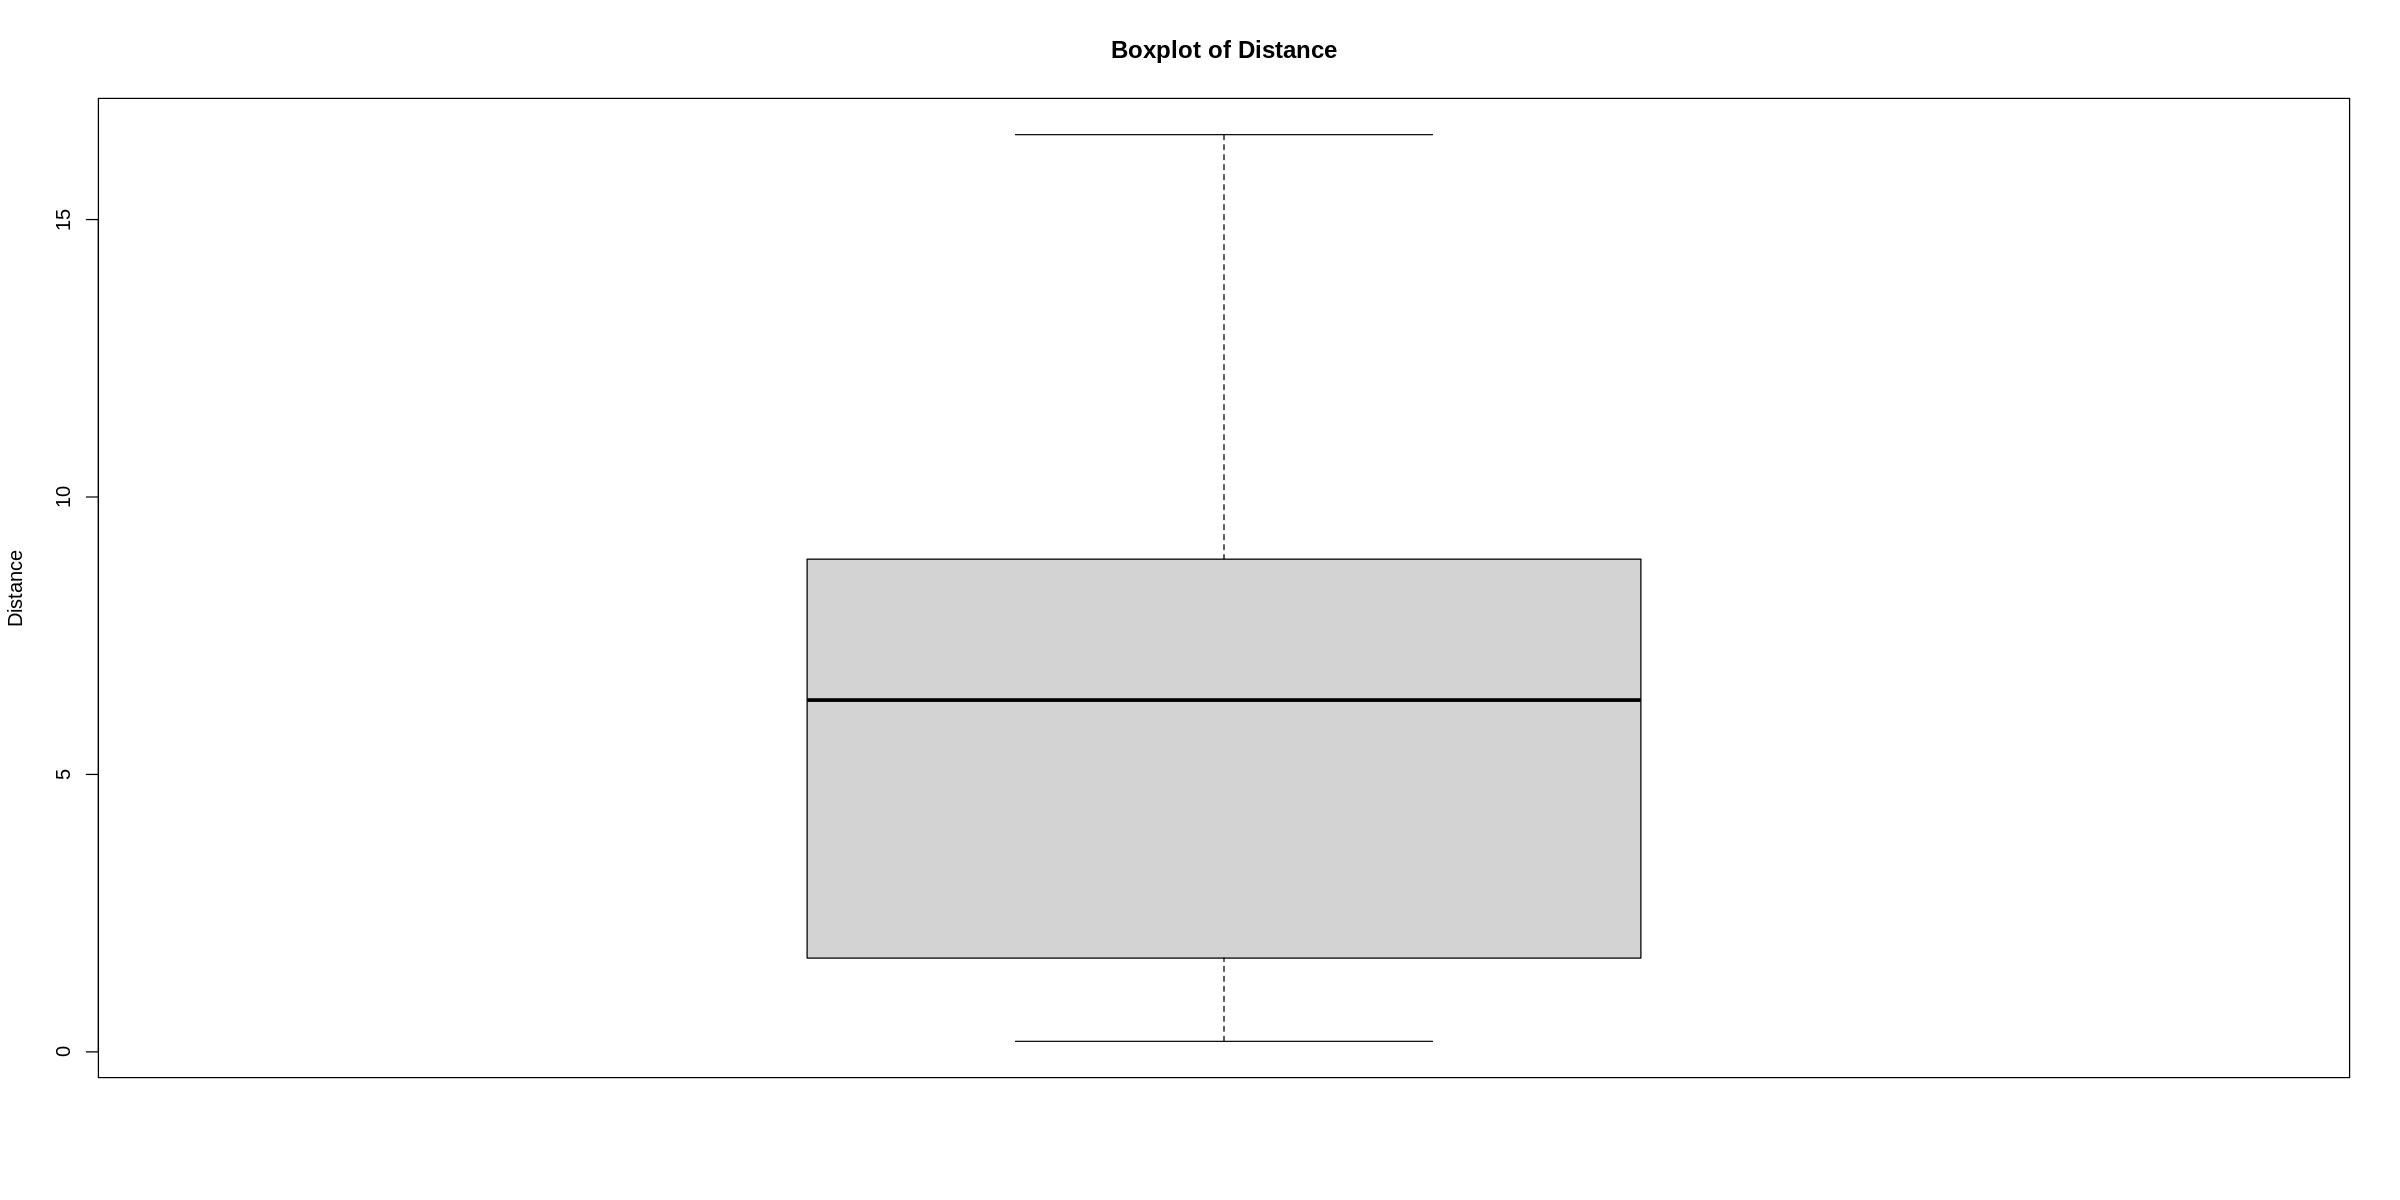

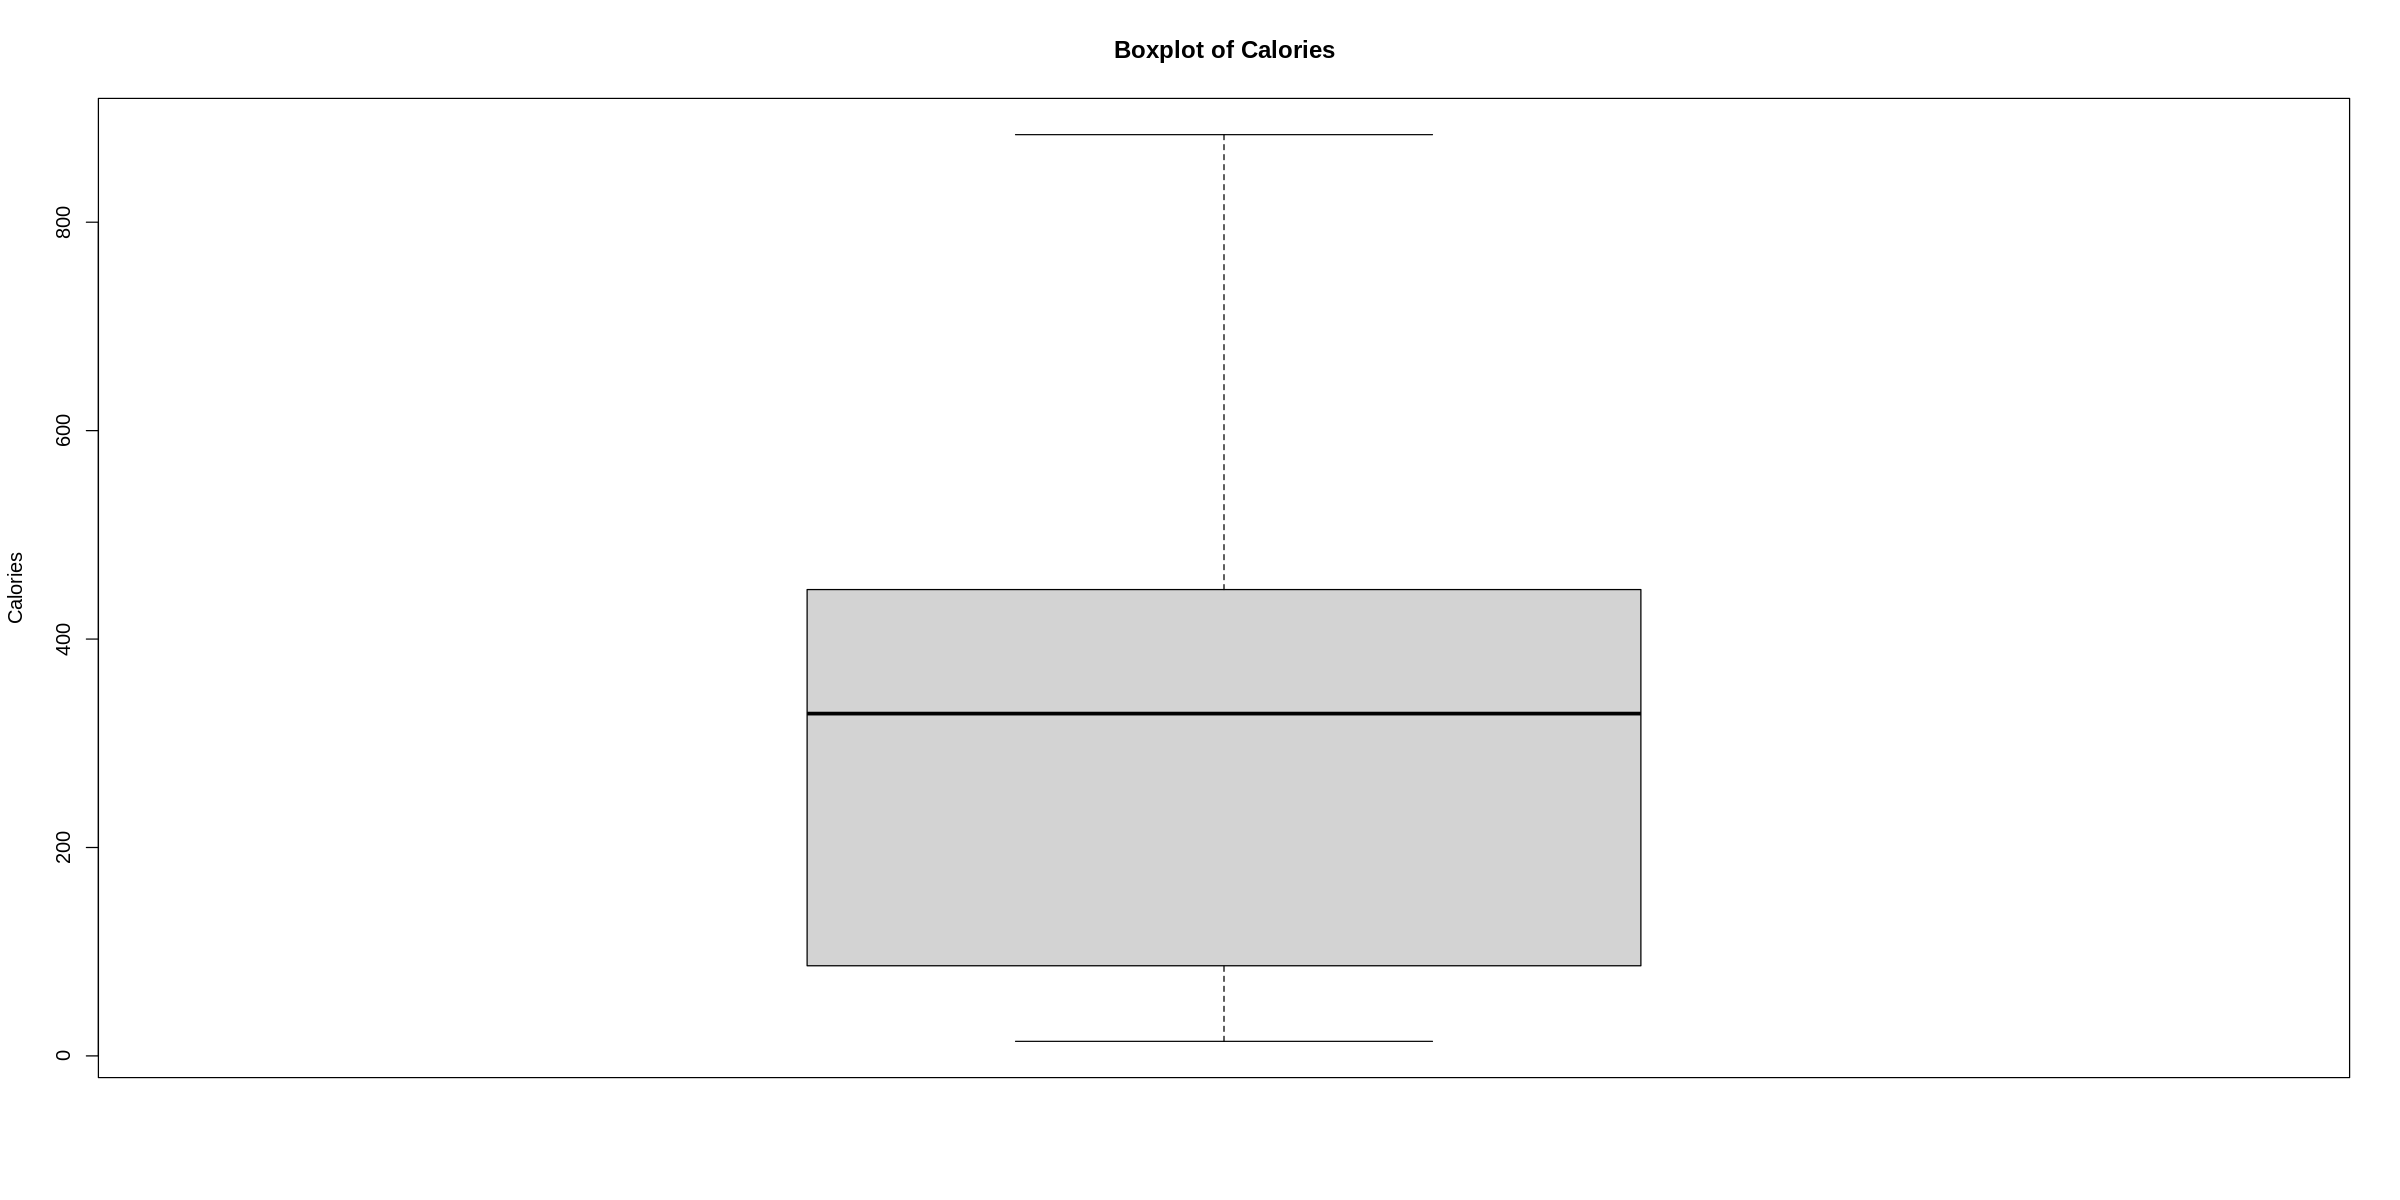

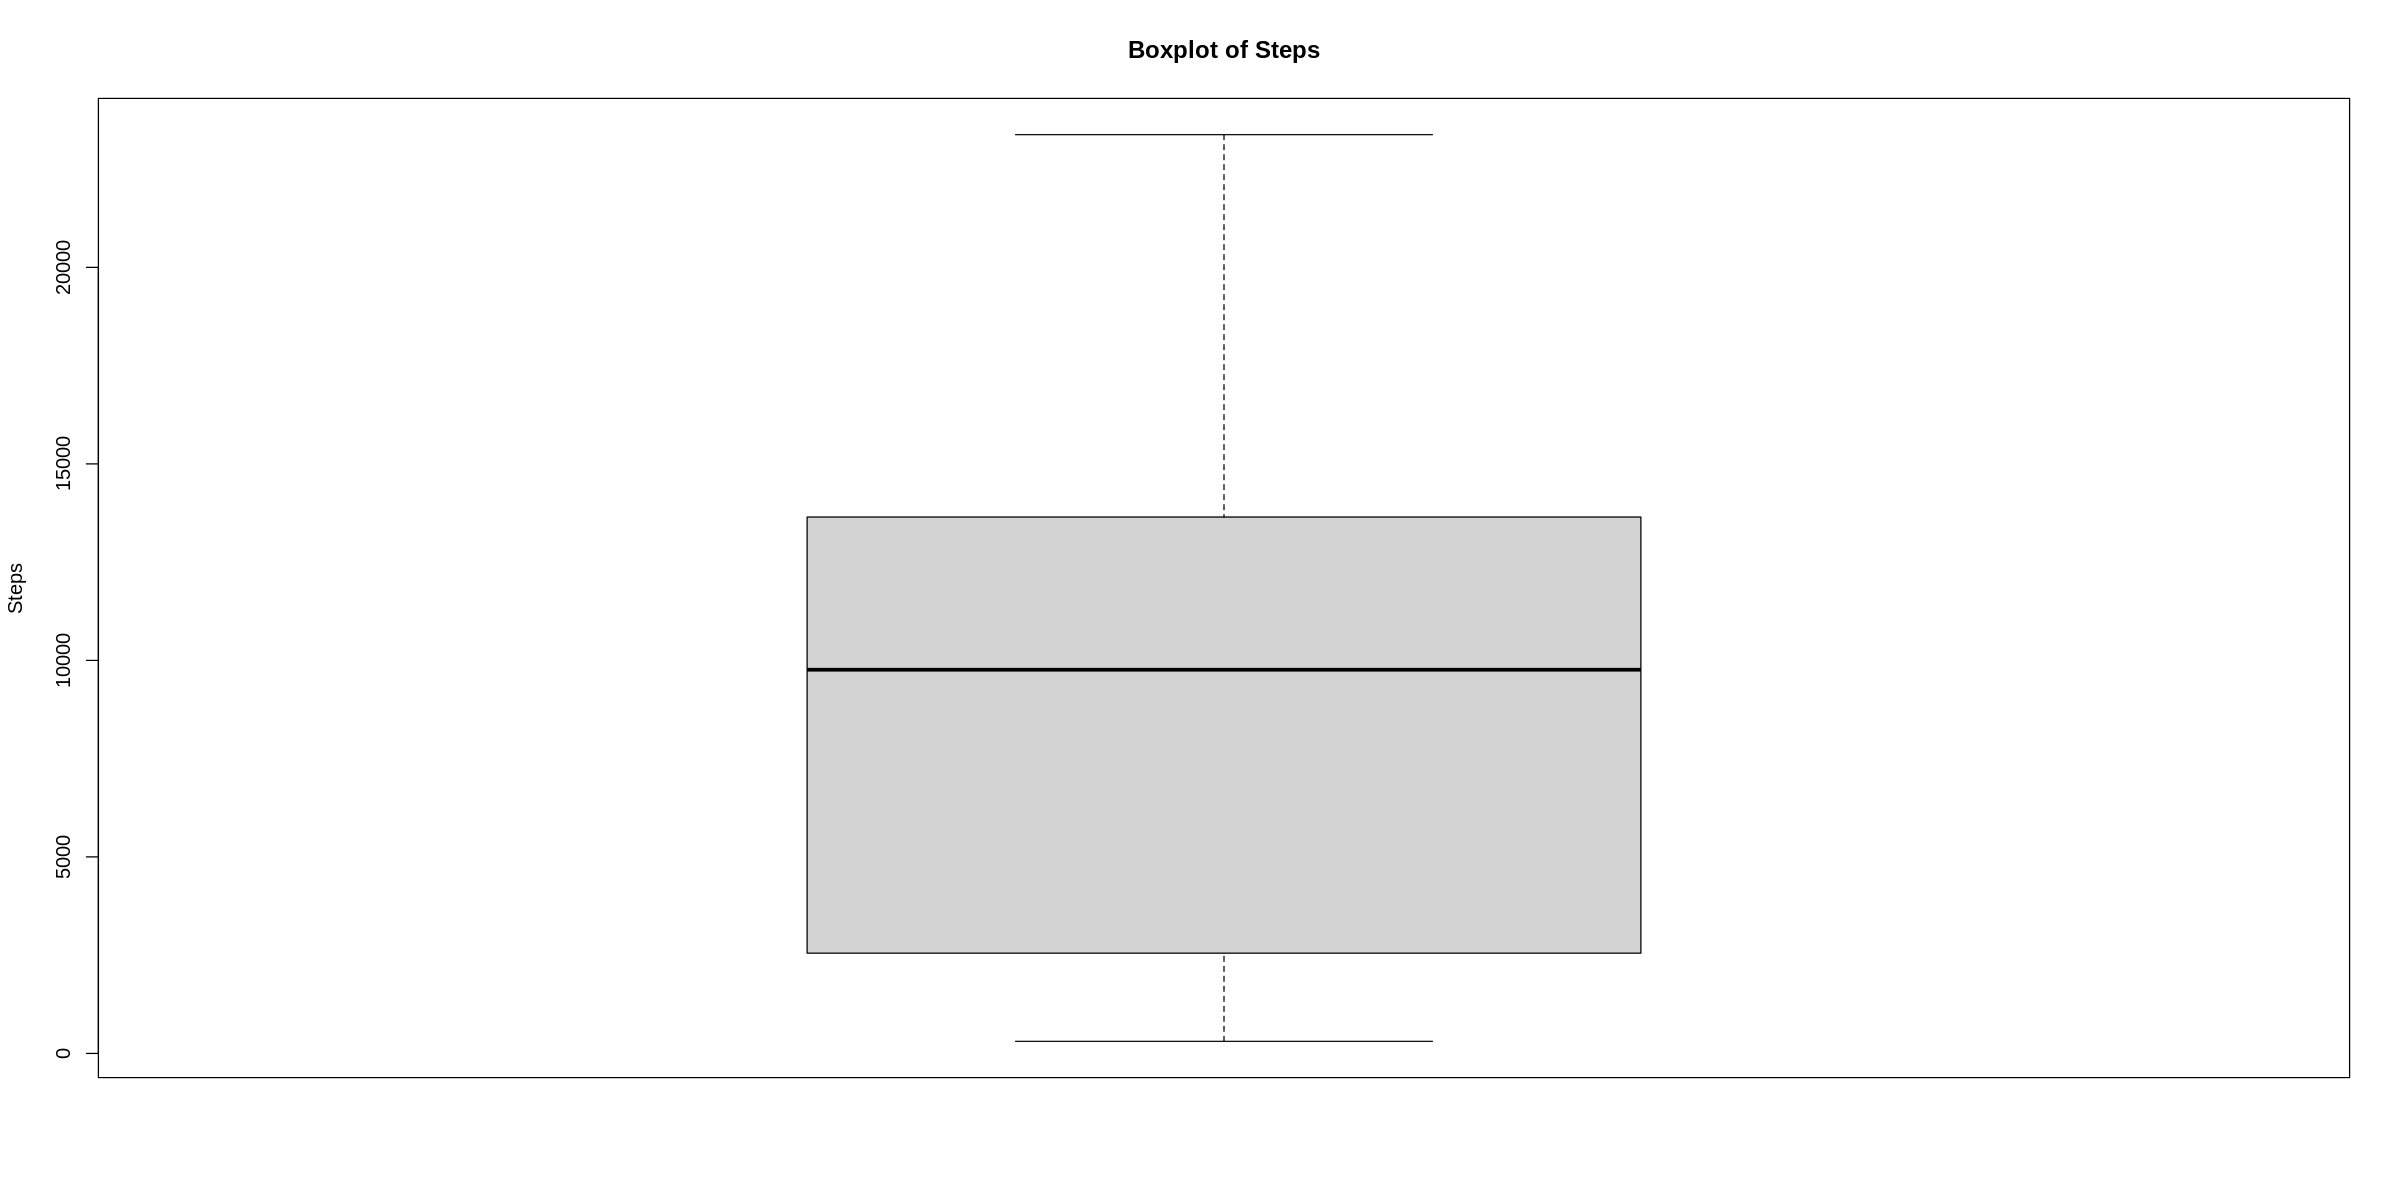

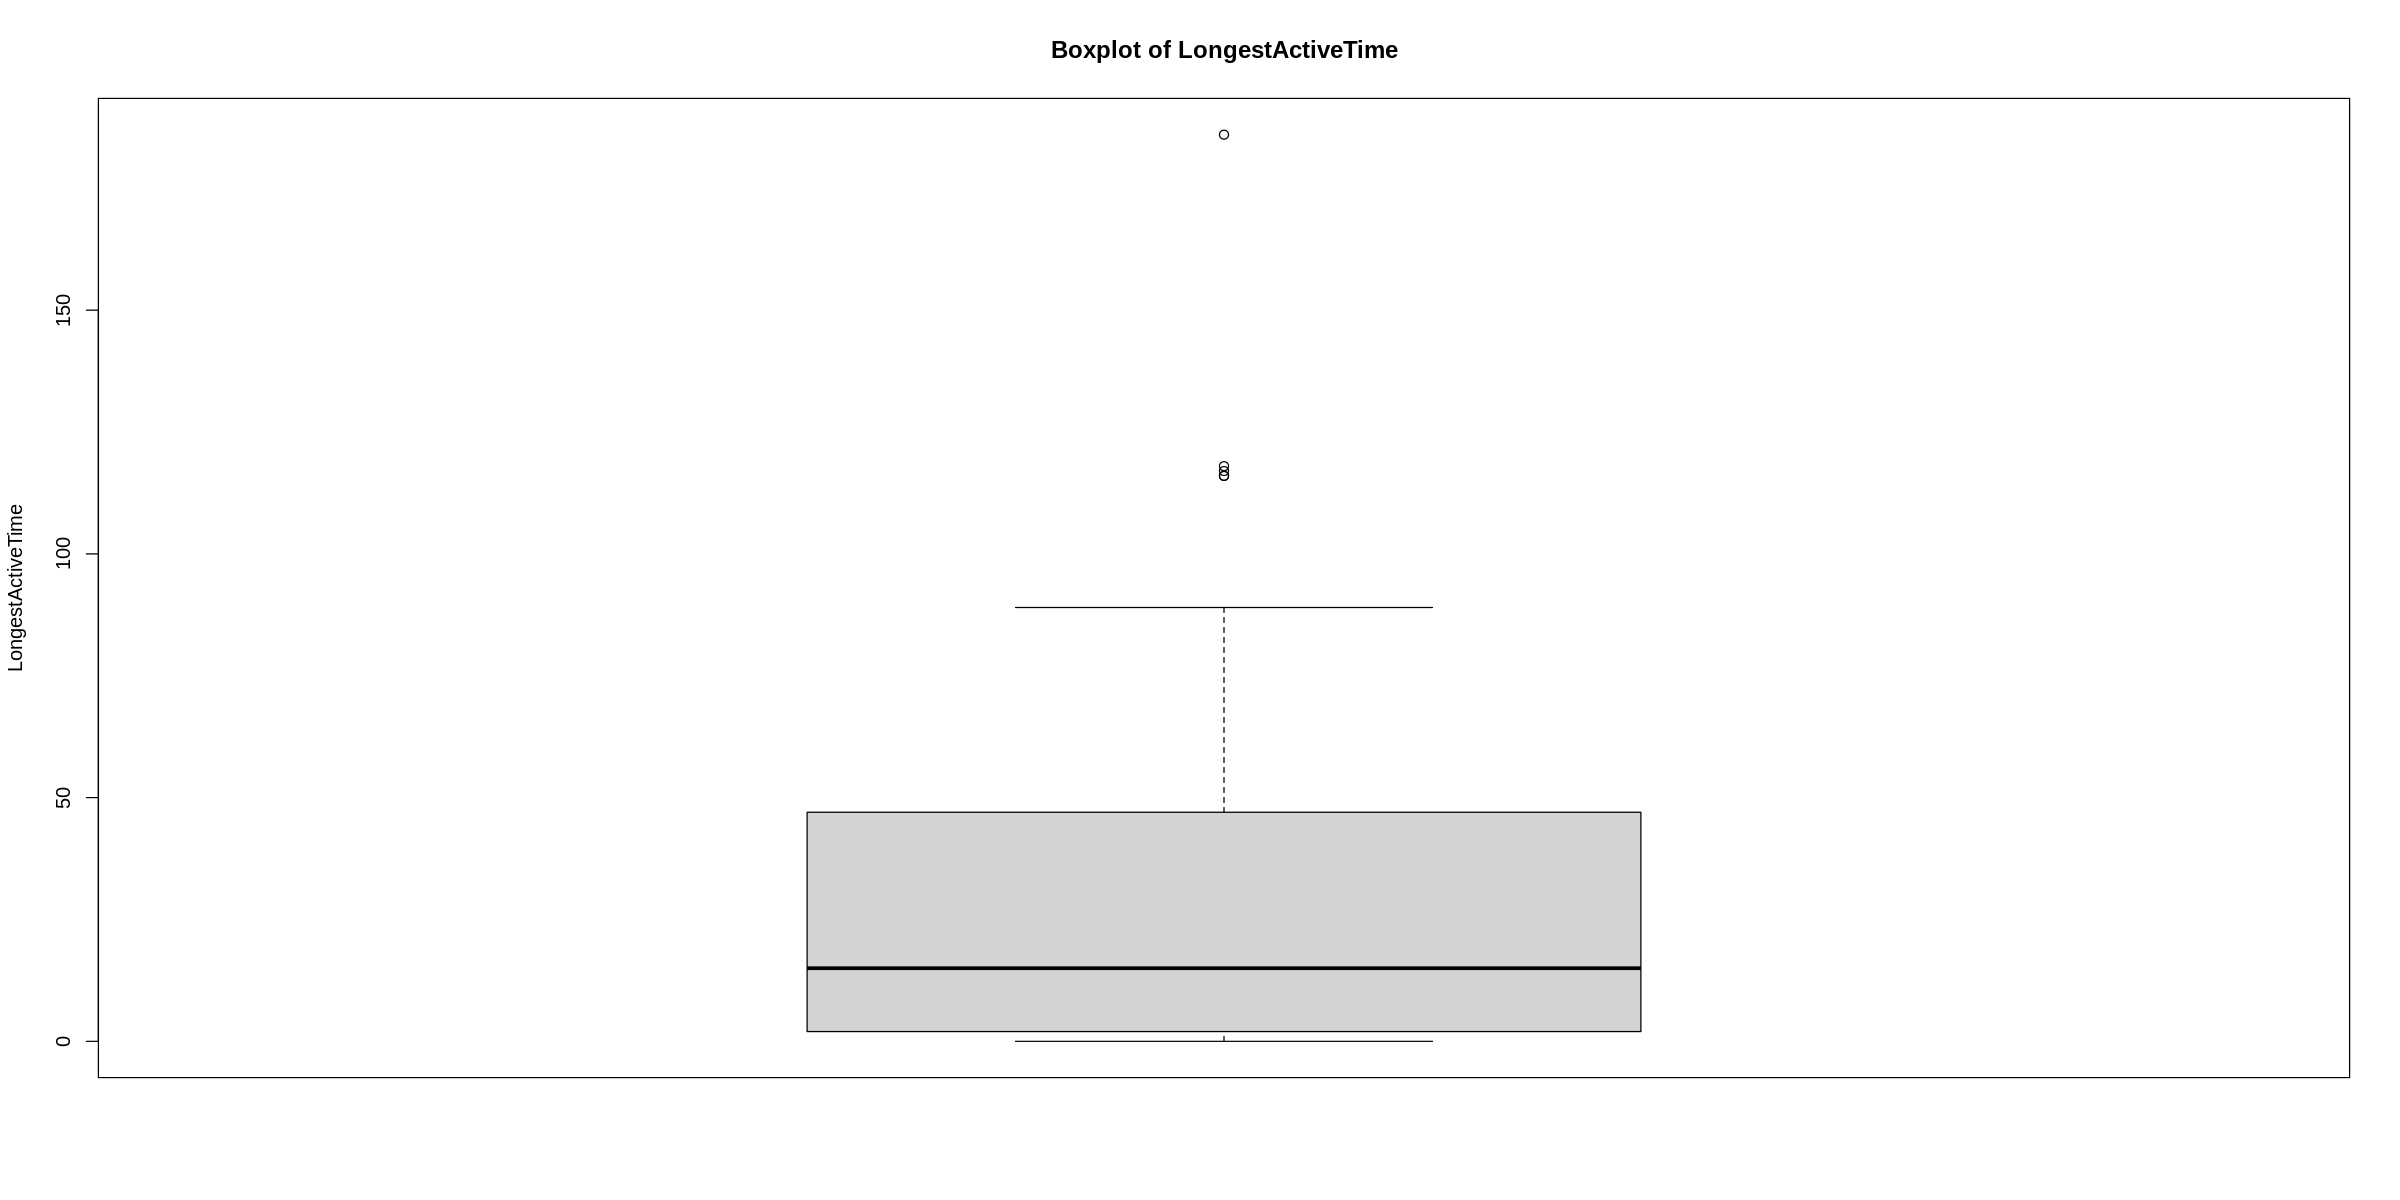

In [204]:
options(repr.plot.width = 20, repr.plot.height = 10)

boxplot(data[1:5], main = paste("Boxplot of Fitness Activity"))

for (i in 1: size){
  boxplot(sub_data[[sub_features[i]]], main = paste("Boxplot of", sub_features[i]),
            ylab = sub_features[i])
}

In this context, my activity is walking, and I am using the age range 40 - 59, and I am investigating if extremely high activity can lead to extremely high or
extremely low(unhealthy) resting heart rate as recommended by world health organisation. So this test is going to be a two-sided test. The null hypothesis is higher activity leads to better resting heart rates(61 <= bpm <= 77), while the alternative hypothesis is that much higher activity might lead to unhealthy resting heart rates(bpm < 61 & bpm > 77).

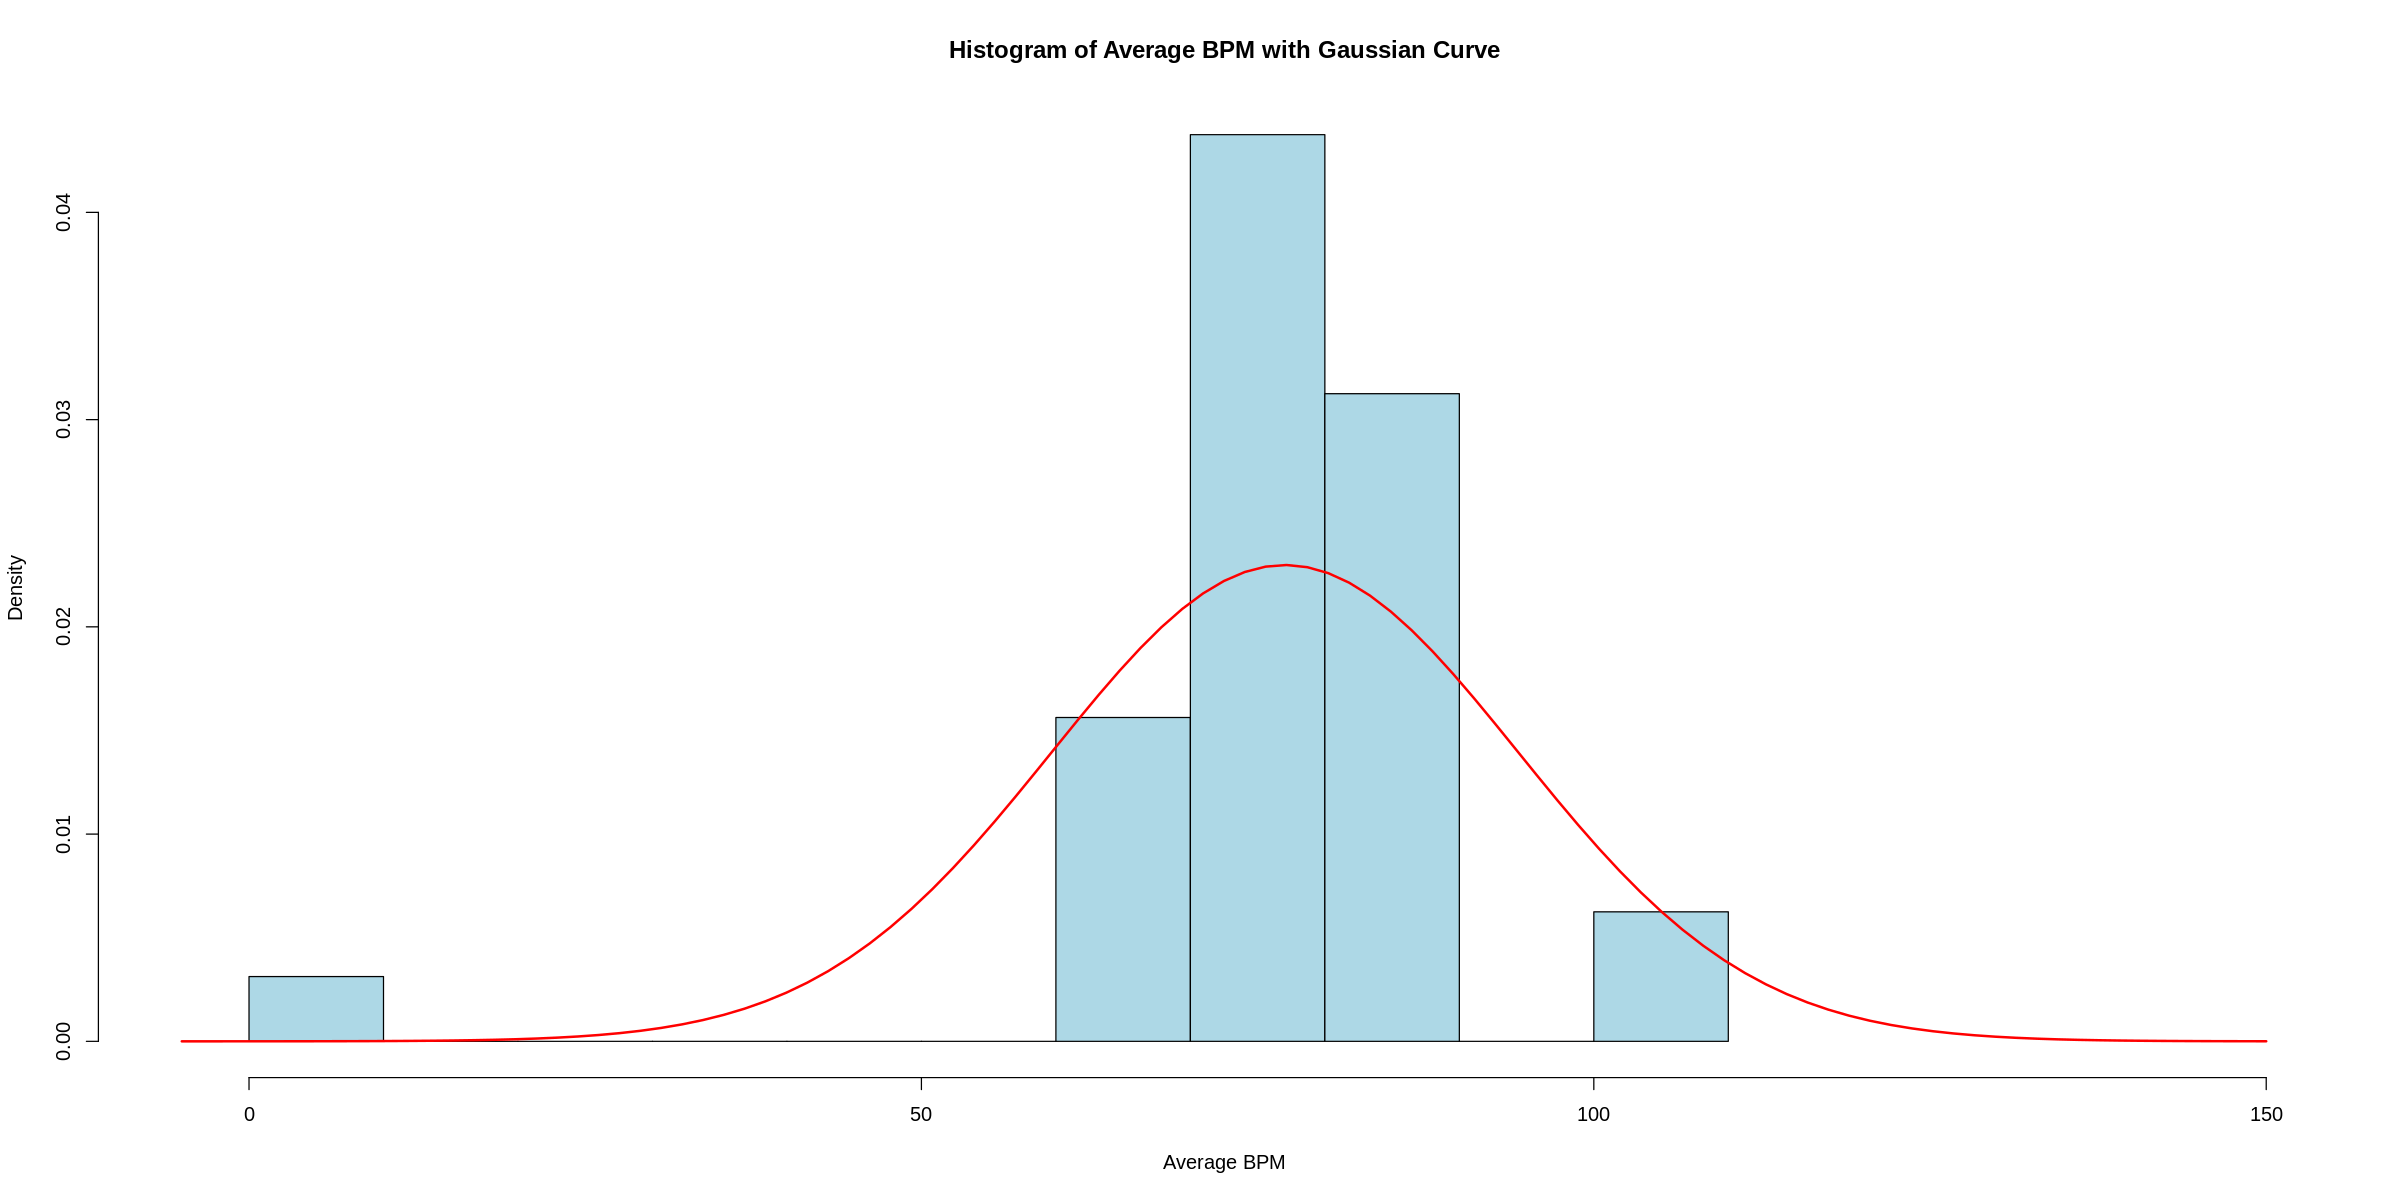

In [205]:
# Calculate mean and standard deviation
bpm <- data$AvgBpm
avg_bpm <- mean(bpm)
sd_bpm <- sd(bpm)

# Create the histogram
hist(bpm, freq = FALSE, breaks = 15, xlim = c(-5, 150),
     main = "Histogram of Average BPM with Gaussian Curve", # Title
     xlab = "Average BPM", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors

# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_bpm, sd = sd_bpm),
      col = "red", lwd = 2, add = TRUE)

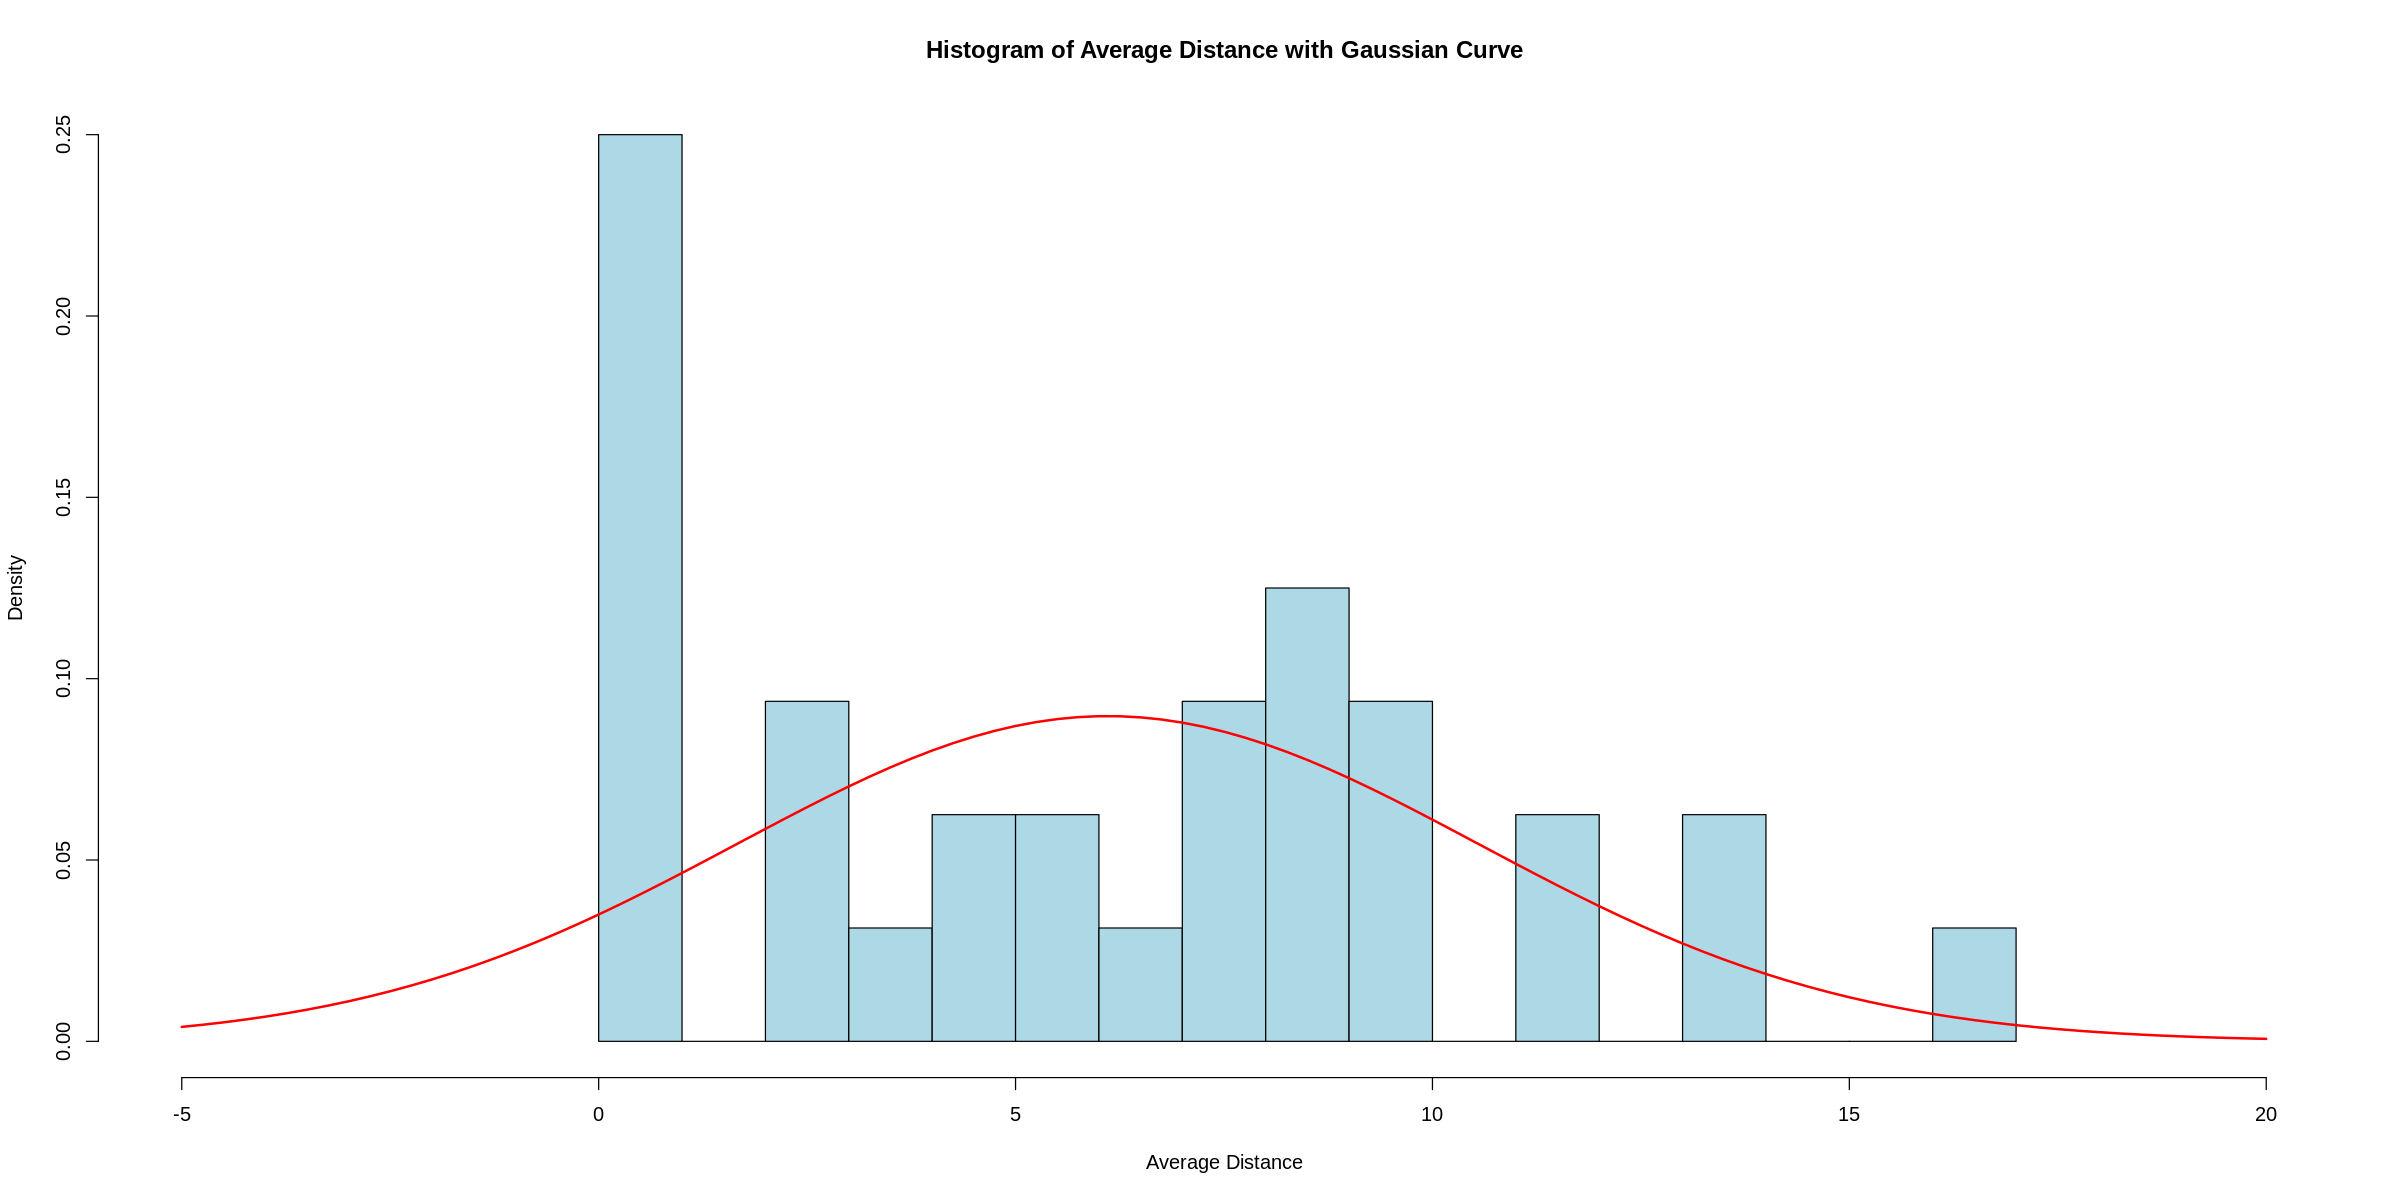

In [206]:
# Calculate mean and standard deviation
distance <- data$Distance
avg_distance <- mean(distance)
sd_distance <- sd(distance)

# Create the histogram
hist(distance, freq = FALSE, breaks = 15, xlim = c(-5, 20),
     main = "Histogram of Average Distance with Gaussian Curve", # Title
     xlab = "Average Distance", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors

# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_distance, sd = sd_distance),
      col = "red", lwd = 2, add = TRUE)


In [207]:
bpm <- sub_data["AvgBpm"] >= 61 & sub_data["AvgBpm"] <= 77
l = min(sub_data$Distance)
r = max(sub_data$Distance[bpm])
l
r
fit = sub_data$Distance>= l & sub_data$Distance <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm
fit_bpm
t.test(fit_bpm, unfit_bpm[1:(length(unfit_bpm)-1)])

[1] 0.19

[1] 8.63

[1] 110 110  78  83  80  82  86  89  79

[1] 85 89 73 77 76 74 67 75 66 74 67 65 67 84 81 81 75 77 82 76  0 80 77


	Welch Two Sample t-test

data:  fit_bpm and unfit_bpm[1:(length(unfit_bpm) - 1)]
t = -2.972, df = 16.13, p-value = 0.008928
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.508907  -4.947614
sample estimates:
mean of x mean of y 
 72.52174  89.75000 


In [208]:
#Steps
l = min(sub_data$Steps)
r = max(sub_data$Steps[bpm])
sort(sub_data$Steps[bpm])
sort(sub_data$Steps[!bpm])
l
r
fit = sub_data$Steps>= l & sub_data$Steps <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm = unfit_bpm[1:(length(unfit_bpm))]

fit_bpm
unfit_bpm

t.test(unfit_bpm, fit_bpm)

[1]   839   928  1066  1086  1243  1245  1472  3631  3992  6470  9639  9886
[13] 11804 12353 12545

[1]   308  5694  7176  8105  8865 10726 12599 12962 13374 13922 14171 14912
[13] 15956 17165 21593 22613 23376

[1] 308

[1] 12545

[1] 73 77 76 74 67 75 66 74 67 65 67 84 81 81 75 77 82 76  0 80 77

[1] 110 110  85  89  78  83  80  82  86  89  79


	Welch Two Sample t-test

data:  unfit_bpm and fit_bpm
t = 3.3701, df = 28.176, p-value = 0.002194
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.720942 27.538798
sample estimates:
mean of x mean of y 
 88.27273  71.14286 


we can deduce from the p-value which is less than the critical value of 5%, that  it is statistically evident that we reject the null hypothesis, which states that been active leads to better resting heart rates. From this evidence, it is evident that way higher activity can lead to having a worse resting heart rating

In [209]:
#Steps
l = min(sub_data$Calories)
r = max(sub_data$Calories[bpm])
fit = sub_data$Calories>= l & sub_data$Calories <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm = unfit_bpm[1:(length(unfit_bpm)-1)]
unfit_bpm

t.test(unfit_bpm, fit_bpm)

[1] 110 110  78  83  80  82  86  89


	Welch Two Sample t-test

data:  unfit_bpm and fit_bpm
t = 2.972, df = 16.13, p-value = 0.008928
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.947614 29.508907
sample estimates:
mean of x mean of y 
 89.75000  72.52174 


Warning message in data$AvgBpm[!fit] - data$AvgBpm[fit]:
“longer object length is not a multiple of shorter object length”


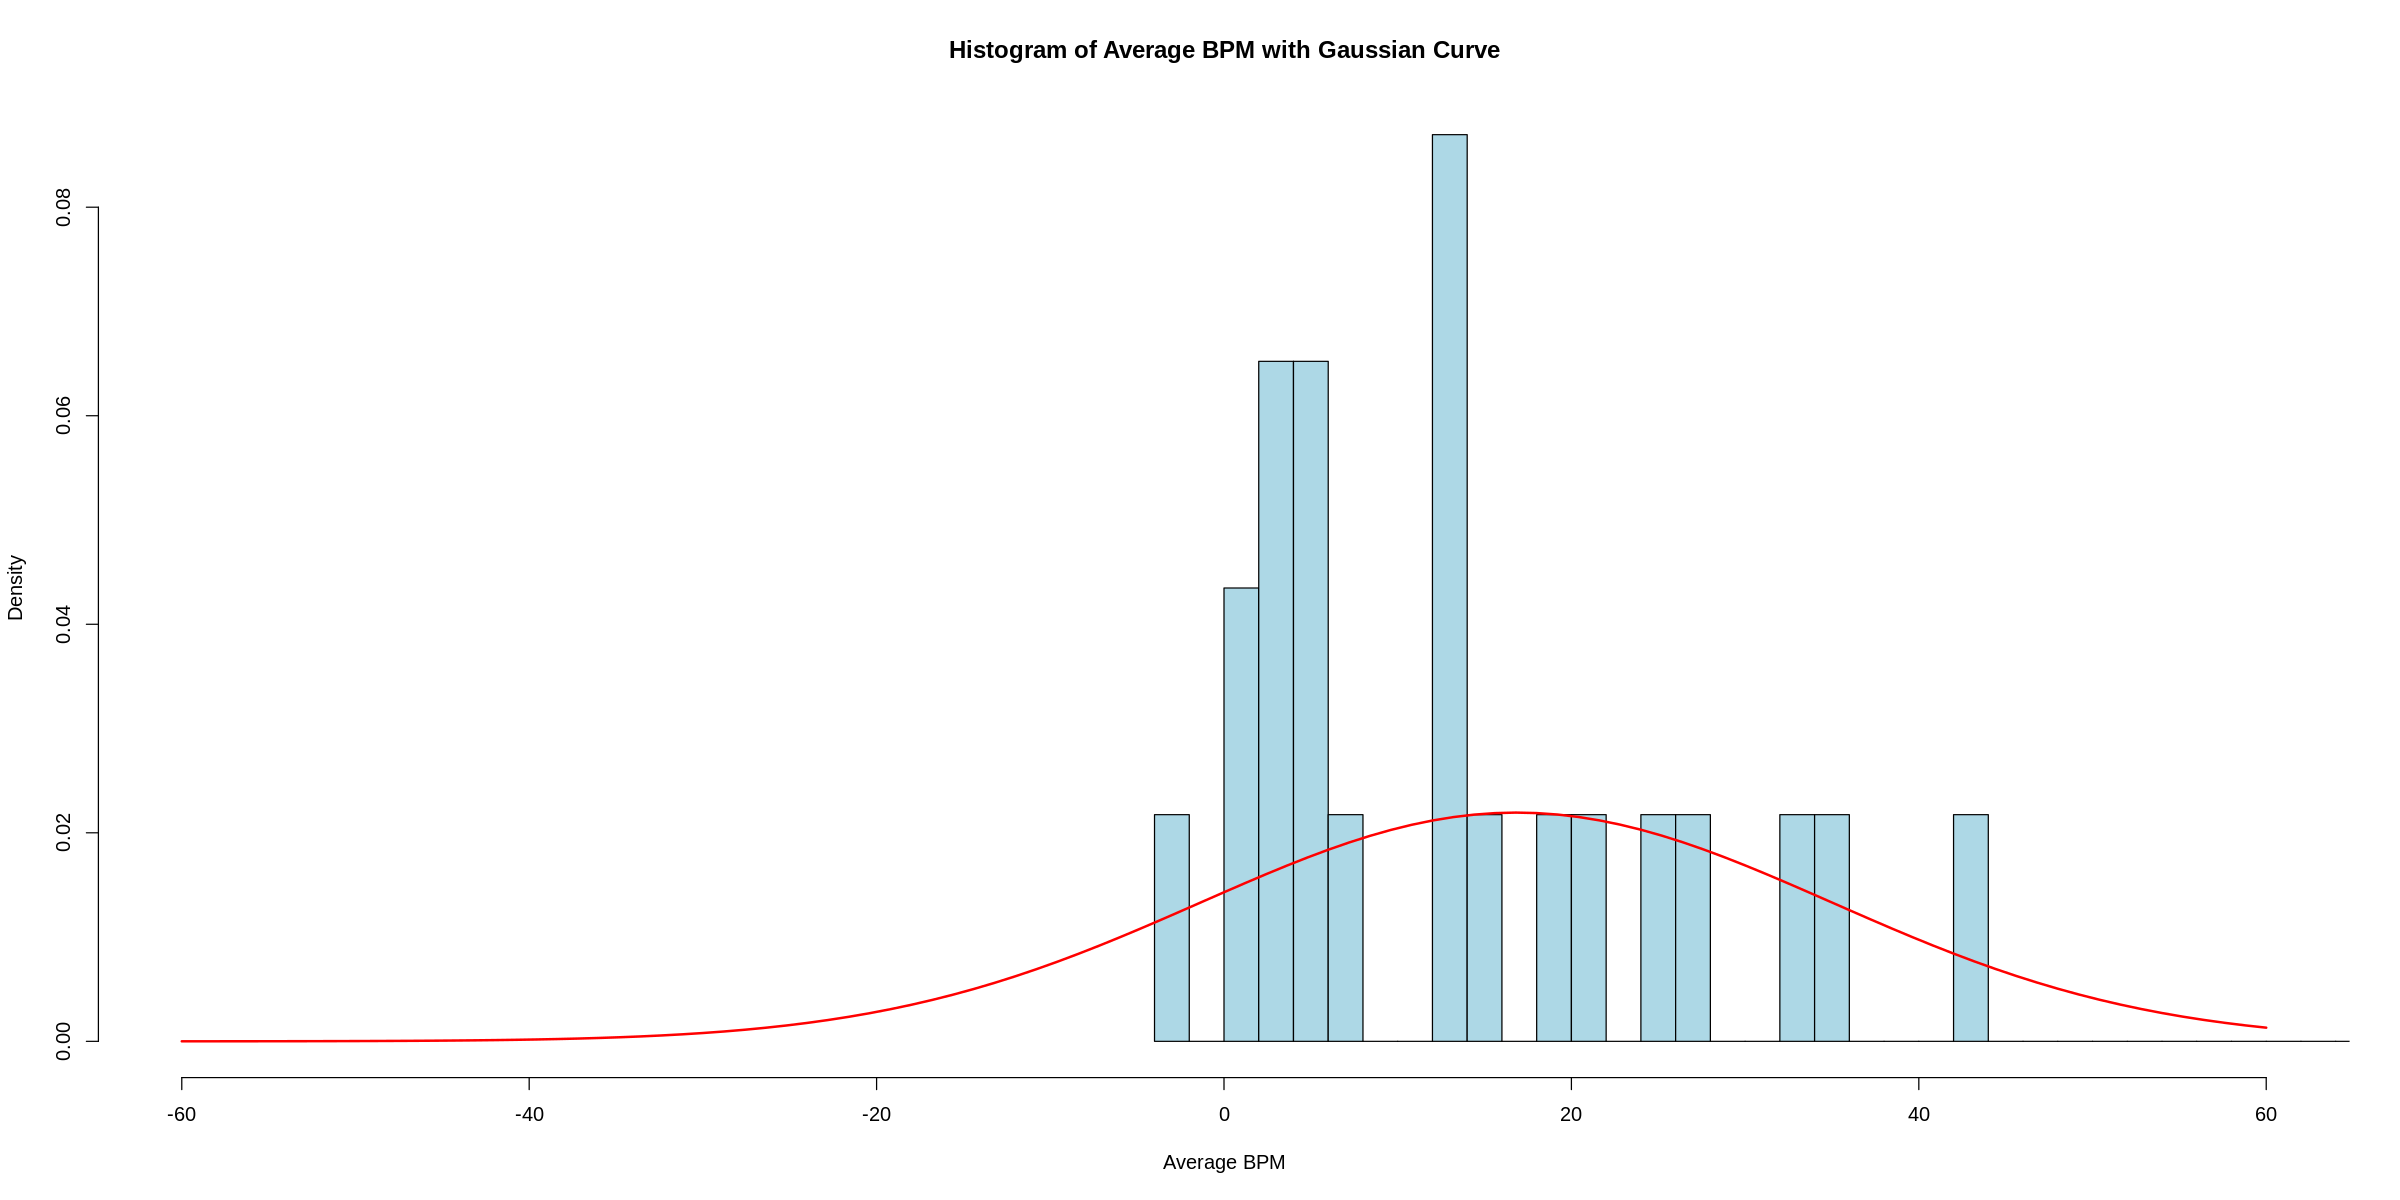

In [210]:
distance_diff = data$AvgBpm[!fit] - data$AvgBpm[fit]
avg_diff <- mean(distance_diff)
sd_diff <- sd(distance_diff)

hist(distance_diff, freq = FALSE, breaks = 30, xlim = c(-60, 60),
     main = "Histogram of Average BPM with Gaussian Curve", # Title
     xlab = "Average BPM", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors
# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_diff, sd = sd_diff),
      col = "red", lwd = 2, add = TRUE)

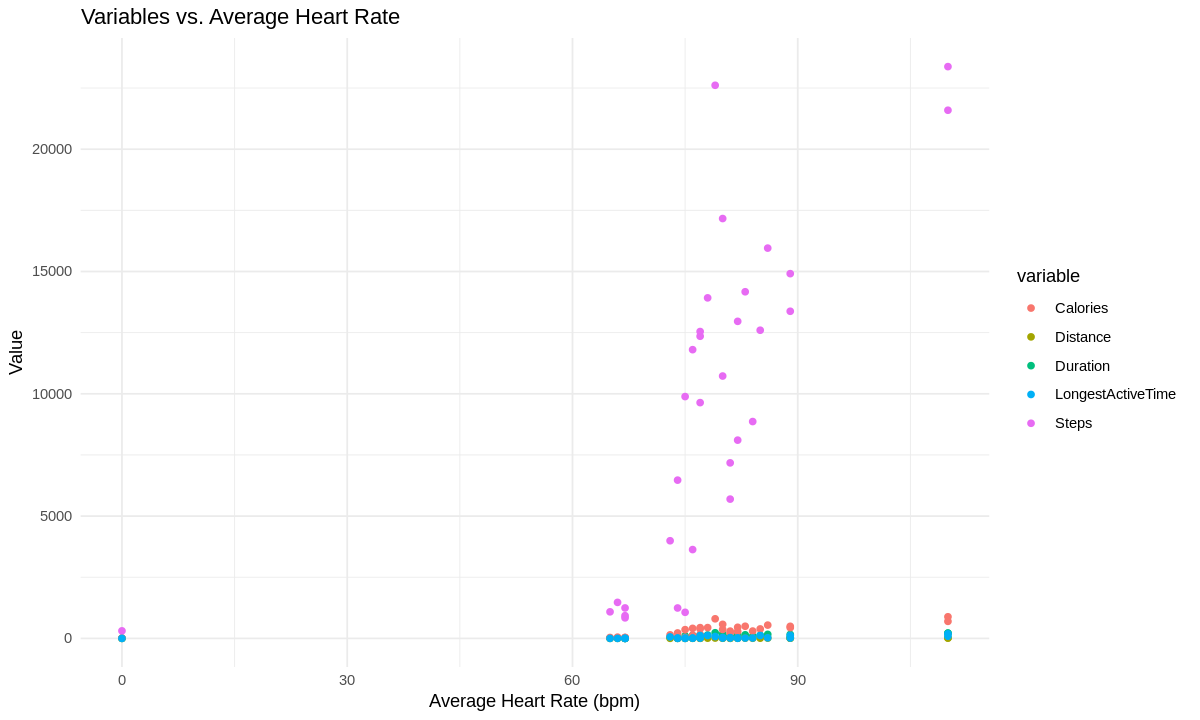

In [211]:
# # Create the plot

options(repr.plot.width = 10, repr.plot.height = 6)

features <- gather(sub_data, key = "variable", value = "value", - AvgBpm)

ggplot(features, aes(x = AvgBpm, y = value, color = variable)) +
  geom_point() + theme_minimal() +
  labs(x = "Average Heart Rate (bpm)", y = "Value", title = "Variables vs. Average Heart Rate")



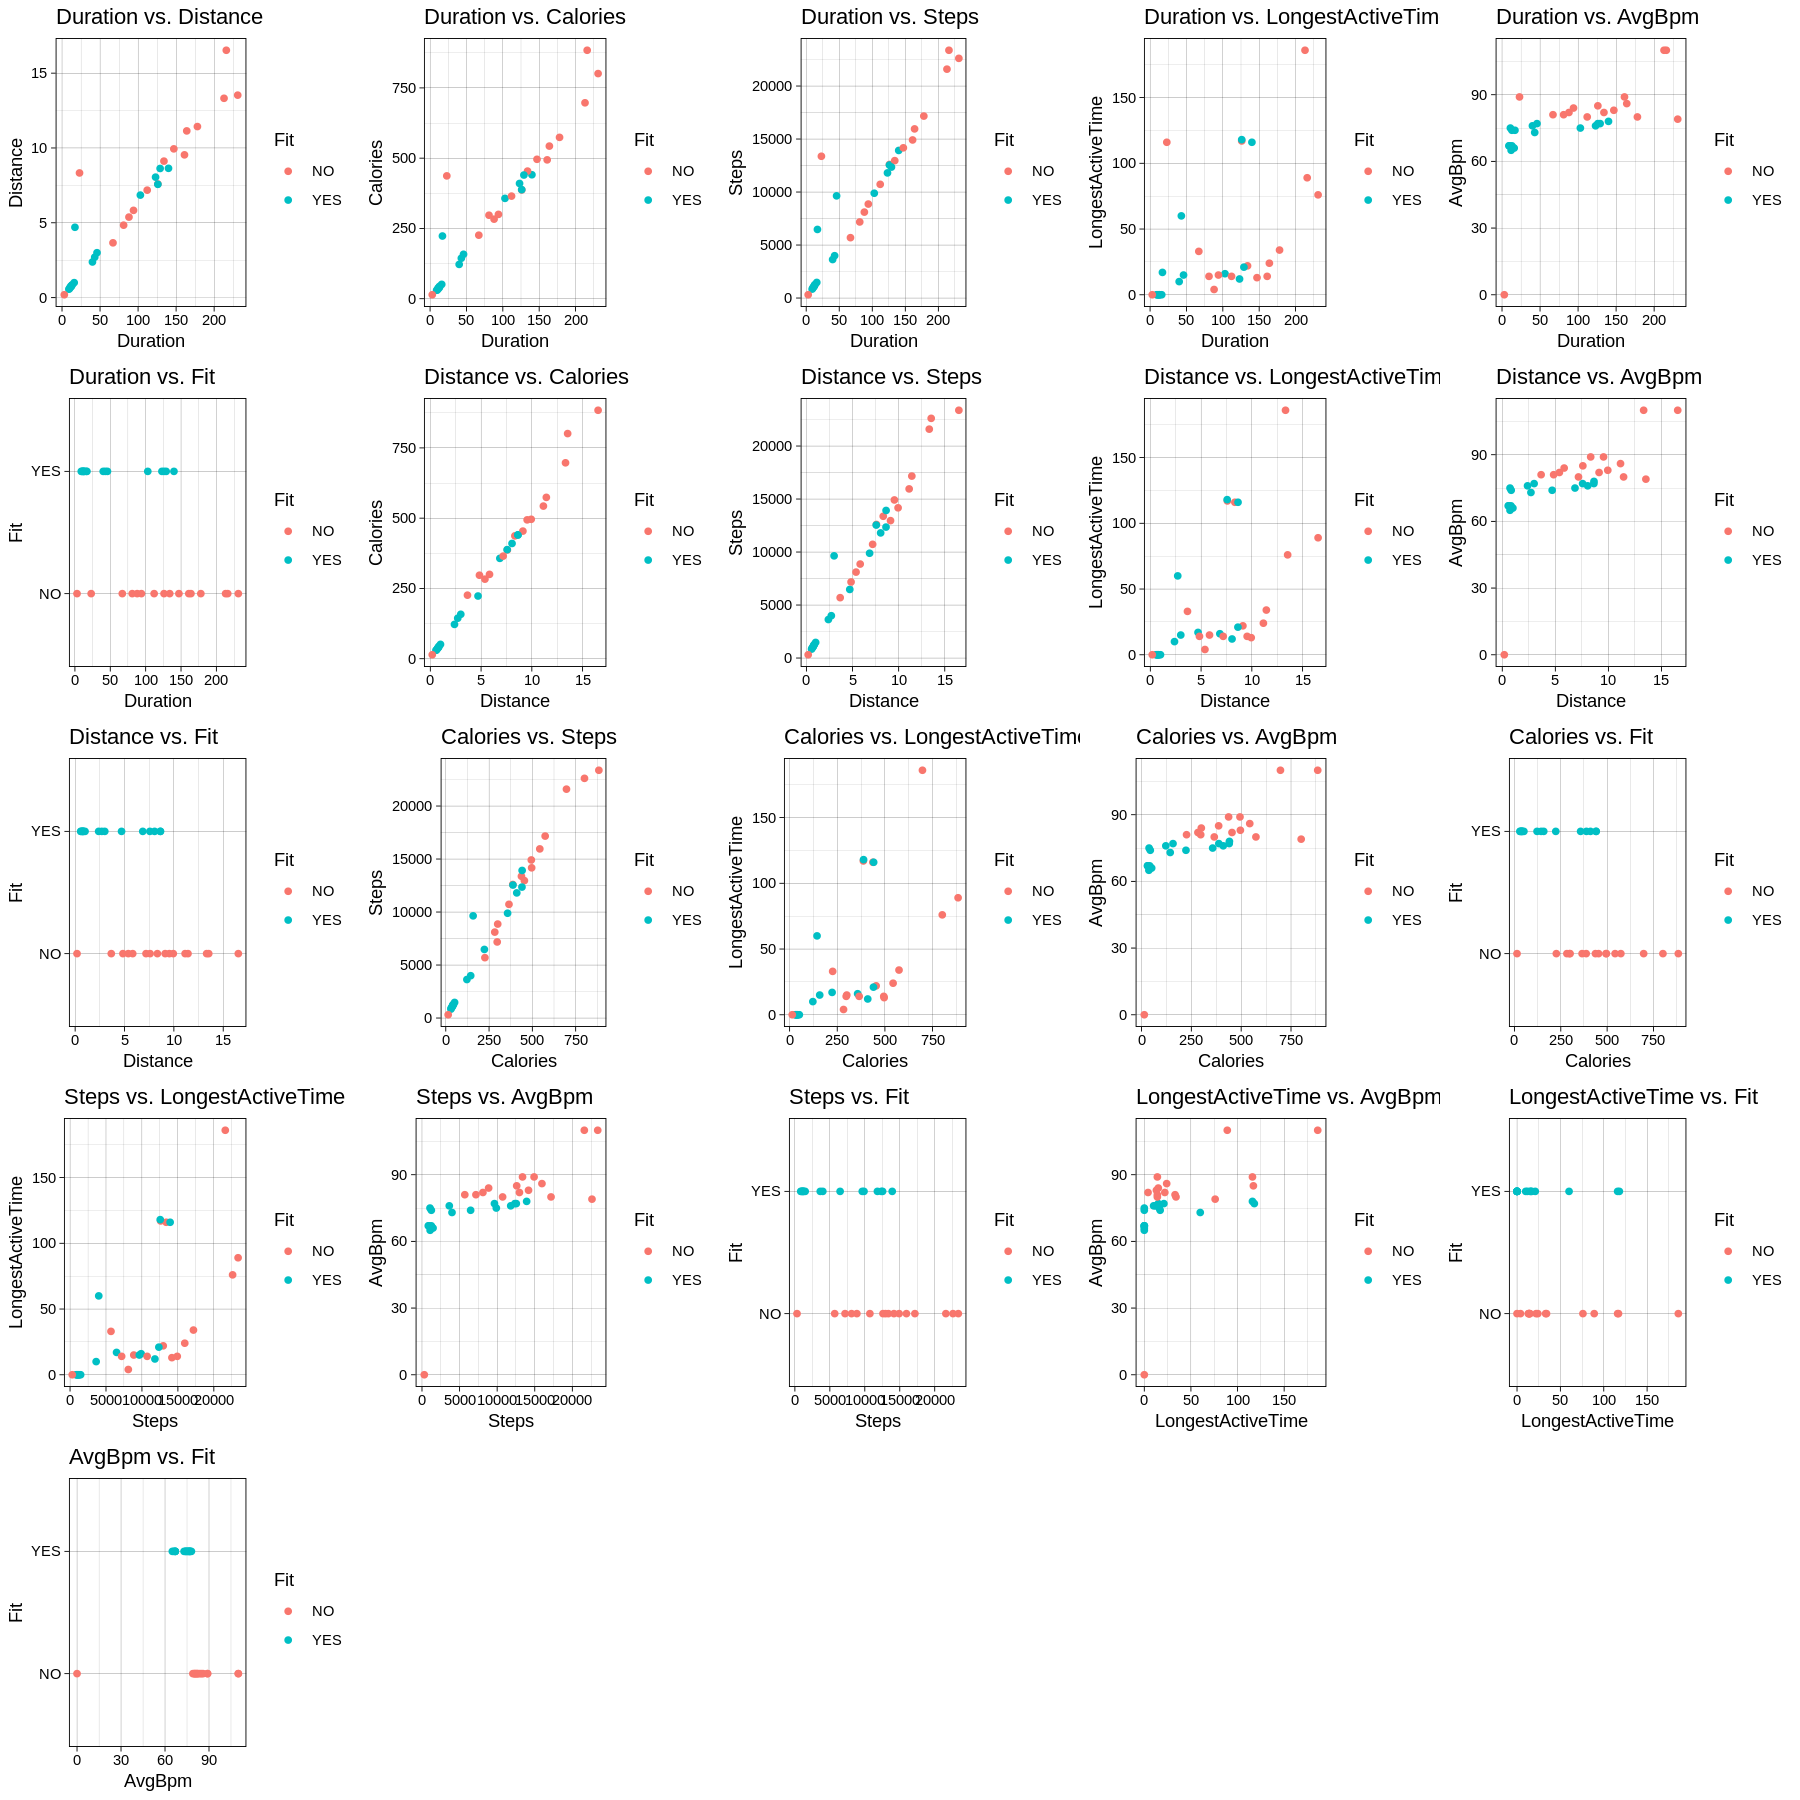

In [212]:

# # Create a long-format data frame
# data_long <- gather(sub_data, key = "variable", value = "value", -`Avg bpm`)

# Get the variable names
options(repr.plot.width = 15, repr.plot.height = 15)

variables <- names(data)

color <- c(1, 2, 3, 4, 5, 6)

# Create a list to store the plots
plots <- list()

# Loop through each pair of variables
for (i in 1:(length(variables) - 1)) {
  for (j in (i + 1):length(variables)) {
    plot_name <- paste(variables[i], "vs.", variables[j])
    plots[[plot_name]] <- ggplot(data, aes_string(x = variables[i], y = variables[j], color = "Fit")) +
      geom_point() + theme_linedraw() + scale_color_discrete() +  # Use the "Set1" color palette

      labs(title = plot_name)
  # ggsave(paste0(plot_name, ".png"), plots[[plot_name]], width = 6, height = 4)

  }
}

# Display the plots
# do.call(gridExtra::grid.arrange, plots)
grid.arrange(grobs = plots, nrow=5, ncol=5)


I want to carry out regression analysis on my dataset.

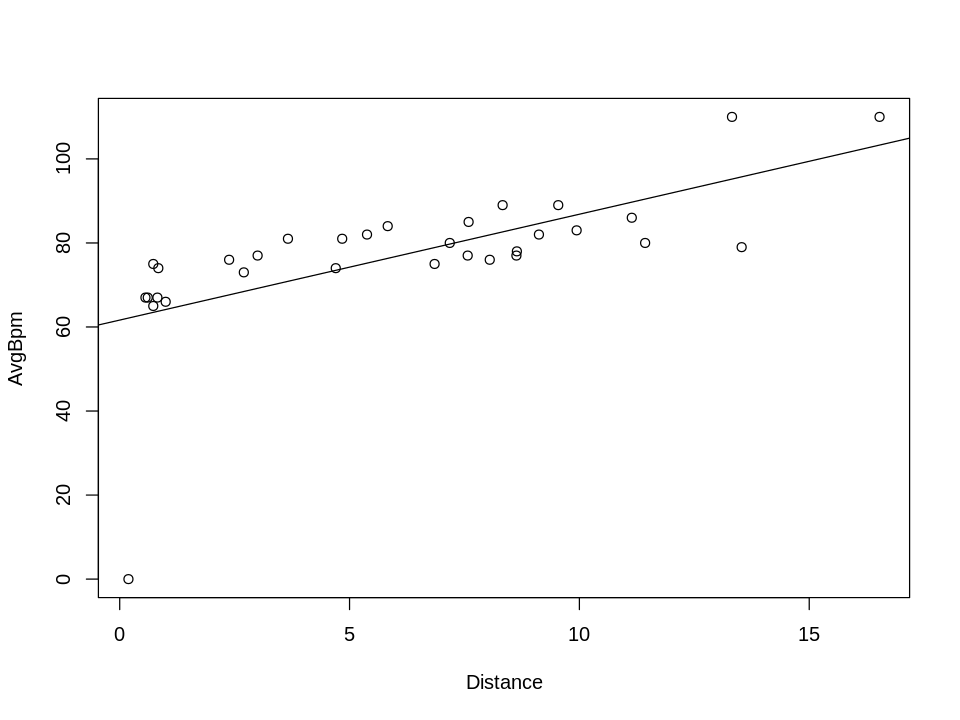

In [213]:
options(repr.plot.width = 8, repr.plot.height = 6)

plot(AvgBpm ~ Distance, data = sub_data)
abline(lm(AvgBpm ~ Distance, data = sub_data))

In [214]:
summary(lm(formula = AvgBpm ~ Distance, data = sub_data))


Call:
lm(formula = AvgBpm ~ Distance, data = sub_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.129  -3.718   3.299   6.885  14.791 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.6503     4.0865  15.086 1.51e-15 ***
Distance      2.5194     0.5439   4.632 6.58e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.47 on 30 degrees of freedom
Multiple R-squared:  0.4169,	Adjusted R-squared:  0.3975 
F-statistic: 21.45 on 1 and 30 DF,  p-value: 6.576e-05


From the scatter plot, I can see that there is a linear relationship between BPM and Distance. The R-squared of 0.3975 is quite small, so lets see if we can make it a lot better. We will therefore do transforms bpm and distance by taking logs to see if it will be better than 0.3975.


Call:
lm(formula = (AvgBpm) ~ log(Distance), data = sub_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.892  -5.782   1.375   4.972  19.309 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     62.179      3.172  19.603  < 2e-16 ***
log(Distance)   11.011      1.782   6.178 8.49e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.7 on 30 degrees of freedom
Multiple R-squared:  0.5599,	Adjusted R-squared:  0.5452 
F-statistic: 38.17 on 1 and 30 DF,  p-value: 8.485e-07


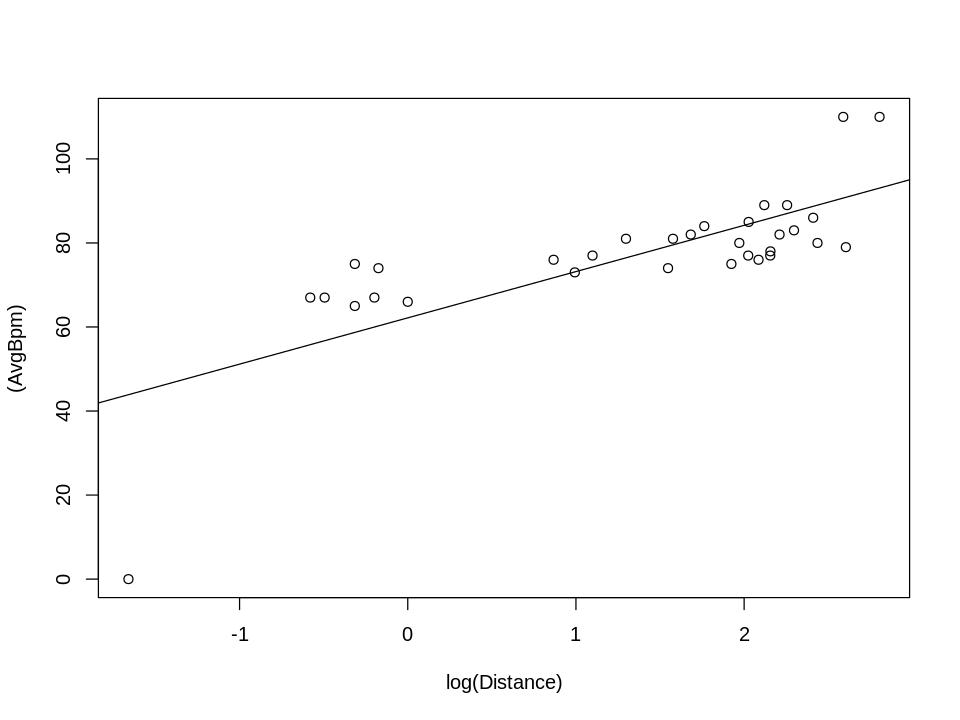

In [215]:
# zero = sub_data$AvgBpm > 0
# my_data = sub_data$AvgBpm[zero]
plot((AvgBpm) ~ log(Distance), data = sub_data)
abline(lm((AvgBpm) ~ log(Distance), data = sub_data))
summary(lm((AvgBpm) ~ log(Distance), data = sub_data))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6762  -5.2373  -0.8724   3.8153  17.6979 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  68.5714     3.5554  19.286 2.84e-15 ***
x             1.7816     0.4103   4.342 0.000262 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.103 on 22 degrees of freedom
Multiple R-squared:  0.4615,	Adjusted R-squared:  0.437 
F-statistic: 18.85 on 1 and 22 DF,  p-value: 0.0002617


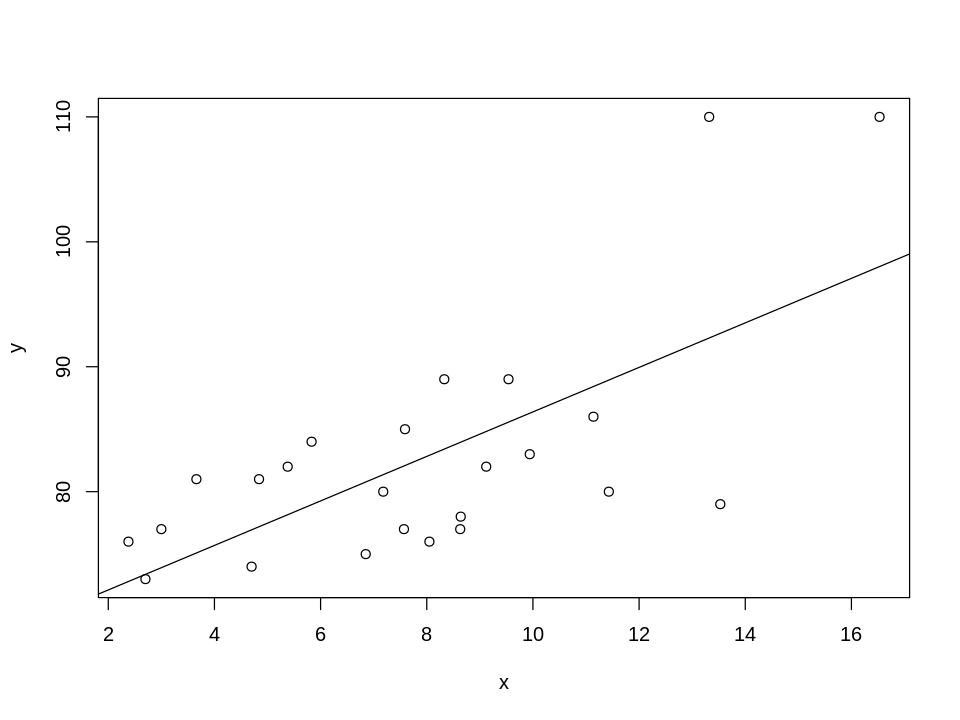

In [216]:
zero = sub_data$LongestActiveTime > 0 & sub_data$AvgBpm > 0
y = (sub_data$AvgBpm[zero])
x = (sub_data$Distance[zero])
# log(sub_data$LongestActiveTime[zero])
# x = log(sub_data$Distance) * log(sub_data$Calories) * log(sub_data$Steps) * log(sub_data$Duration) * log(sub_data$LongestActiveTime[zero])
# y = log(sub_data$AvgBpm[zero])
# y

plot(y ~ x)
abline(lm(y ~ x))
summary(lm(y ~ x))


In [334]:
sub_data = subset(sub_data[1:6], AvgBpm > 0)
sub_calories = sub_data$Calories
calories = (sub_data$Calories)[1:(nrow(sub_data)-1)]
# calories
l = min(sub_calories)
r = max(calories[bpm])
l
r
calories[bpm]

fit = calories >= l & calories <= r
fit
# # fit_bpm = data$AvgBpm[zero]

fit_bpm = sub_data$AvgBpm[fit]
# length(fit_bpm)
unfit_bpm = sub_data$AvgBpm[!fit]
# unfit_bpm = unfit_bpm
# unfit_bpm
s_calories = sub_data$Calories[fit]
unfit_s_calories = sub_data$Calories[!fit]
length(s_calories)
# length(s_calories)

# x = (unfit_s_calories)
# y = (unfit_bpm)
# plot(y ~ x, xlim = c(0, 1000), ylim = c(0, 150))
# abline(lm(y ~ x))
# summary(lm(y ~ x))


[1] 30

[1] NA

[1] 144 388 122 223  31 357  51  44  41  37  30  38 158 410  NA

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA

[1] 31